# Introductory for credit risk analysis

<p style='text-align: justify;'> With the introduction of Basel II, banks are allowed to use their internally developed models for calculating regulatory capital. This is known as the Internal Ratings-Based (IRB) approach. Otherwise, the bank should calculate its regulatory capital based on the standardized approach which generally demands higher capital requirements. The purpose of the development of rating models is to identify and combine those factors that differentiate between facilities the best in terms of riskiness. Three main elements of loss equation terms used to describe the risk of facilities are the probability of default (PD), loss given default (LGD), and exposure at default (EAD). </p>


<p style='text-align: justify;'> By its definition, PD, is a quantitative measure of how likely an applicant for credit is to default within a certain period. Numerous models are available to pursue however, currently, the most commonly used one is the logistic regression (LR) approach. Very recently, survival analysis has been introduced into three main stages of credit risk modeling (PD, LGD, and EAD). This collection of statistical methods tries to model the time to default and has advantages compared to other credit risk analysis methods. The goal of the current project is to implement estimation of the PD which is to pursue the survival analysis as a theoretical framework.</p>


<p style='text-align: justify;'> All PD models share the same basic ideas. The first step is to classify a sample of previous customers based on historical repayment performance, into either good or bad. The next step is to link the characteristics (factors) of these clients to the default status of the client. Many different techniques are available for building such systems, for example, discriminant analysis, expert systems, and logistic regression. Currently, logistic regression is an industry-standard.</p>



<p style='text-align: justify;'> Lately, the concept of survival analysis has been introduced into credit risk modeling. Immediately raised question would be, what is the survival analysis? Survival analysis is the area of statistics that deals with the analysis of lifetime data. The variable of interest is the time to the occurrence of an event. It is worth mentioning that, it is commonly used in medical drug studies and reliability studies in engineering. As an example, in medical studies, the effect of a drug on the lifetime of a patient with a certain disease can be studied. The time to event in this case is defined as the time till death. </p>


<p style='text-align: justify;'> In the case of credit risk, the event of interest is default. The main advantage of survival analysis compared to other existing credit risk models frameworks is that the model is capable of including censored and truncated data in the development sample. While in the methods such as the logistic regression approach, this new observation which might play a more relevant role than older observations has to be removed from the dataset. Right censoring is the most common type of censoring and states that the event is not observed within the study period. In the case of credit risk: a customer who doesn’t default. Because most of the customers do not default, a lot of new observations are right-censored. </p>


<p style='text-align: justify;'> Another type of missing data is truncated data, of which left-truncation is the most common type. In this case, no information from the start of the loan until it is observed in the dataset is available. For example, if a loan is initiated before the study period, there is no observation of the start of this loan.</p>


<p style='text-align: justify;'> The survival analysis,  pursue a time-dependent dataset as feed. Hence, 
the use of survival analysis instead of logistic regression demands some new procedures. For example, if a facility is assessed yearly, the last observation has more information about the current creditworthiness of a facility and should be incorporated into the model. </p>

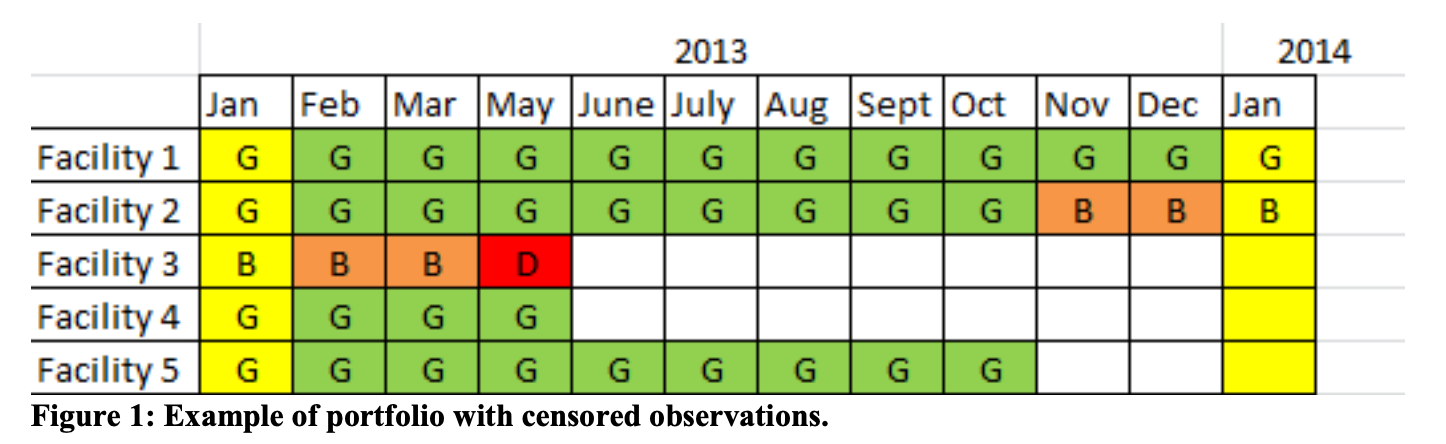
<p style='text-align: justify;'> In above figure, a schematic view of a typical portfolio is given. Facility 3, 4, and 5 leave the portfolio during the year (Facility 3 defaulted; Facility 4 and 5 are for example sold). Facility 3 is the event of interest in PD modeling and remains in the portfolio. On the other hand are Facility 4 and 5 were removed from the dataset because they are not in the portfolio for 1 year. These are called censored observations. </p>


<p style='text-align: justify;'> The objective of this project is to implement PD estimation using a survival analysis approach. To keep the concepts consistent with the currently in use approaches like logistic regression, I will try to adopt an already tested and in use structure.</p>

# PD modelling process 

<p style='text-align: justify;'> Generally, a typical PD (more generally scorecard) modeling framework consists of five major steps and is presented below figure. With the development of the survival analysis framework, the focus is on the two phases: scorecard development and calibration. These are the stages that will differ from the current modeling process. I have to mention that in the following, I will focus on PD modeling rather than a scorecard. Hence, some of those steps such as score transformation will not be used but, for the sake of generality I just will mention them.</p>

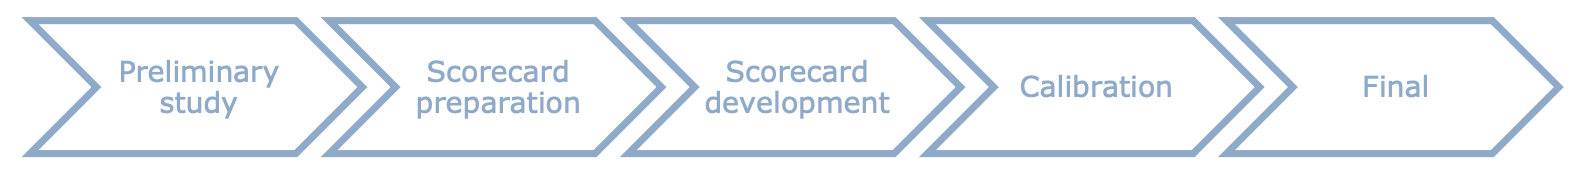

<p style='text-align: justify;'> As is shown in the above graph, any typical probability of default modeling consists of five steps. In the next paragraphs, I will try to briefly explain what they do. </p>

<p style='text-align: justify;'> The initial set-up or preliminary study provides an overview of the development of the model. It names all people in the development team, the objective of the model and regulatory requirements, and finally the methodology. </p>

<p style='text-align: justify;'> In the scorecard preparation phase it is all about factors. Factors are explanatory variables known as covariates. This stage identifies, collects, links, and cleans these factors to make them ready for regression. </p>


<p style='text-align: justify;'> The third stage, scorecard development, will be redeveloped and consists of single-factor analysis (SFA) and multifactor analysis (MFA). The SFA examines the standalone discriminatory power and predictive power of the individual factors. To reduce the number of factors in the multifactor analysis only the best predictive factors are selected. Next, the factors are transformed into interpretable scores, i.e., between 0-10. The SFA is followed by the MFA, this stage combines the best standalone predictive factors into a model. Correlation between factors is taken into account to create a stable and robust final model. The output of the MFA is not a credit rating but a creditworthiness score. The higher the score, the lower the expected PD of the facilities. </p>

## <p style='text-align: justify;'> Single factor analysis </p>

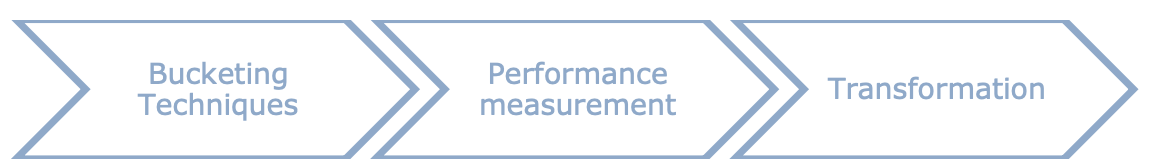


* <p style='text-align: justify;'> The first main stage in the model development, as well as implementation, is the single-factor analysis. In this stage, the factors that have predictive power for defaults are selected and transformed. For example, a defaulted counterparty before the default is likely to have factor scores that are significantly lower or higher than other comparable counterparties that did not default. The main task is to find the factors for which either high or low values correspond to high PDs. </p>



* <p style='text-align: justify;'> Next step is the performance measurement of each individual factor (used in the scorecard development. here we will not use this just mentioned for the sake of generality). This is the measure of the predictive power of an individual factor. This measure is used in the selection and transformation of factors. Four measures of predictive power are given: Power Statistic, Weight of Evidence (WoE), Information value, and trend analysis (Siddiqi, 2005). </p>

#### Bucketing
<p style='text-align: justify;'> In this project, we will only use of the bucketing technique in the single-factor analysis. In order to make credit-scoring systems robust, it is an industry standard to split continuous variables into bins. This process is also called bucketing. The goal of this process is threefold:</p>

* <p style='text-align: justify;'> The relation between the creditworthiness indicator and factor value can be assessed more easily by experts.
 </p>
* <p style='text-align: justify;'> Bucketing can be useful in transformation. </p>
* <p style='text-align: justify;'> Some performance tests require buckets. </p>


<p style='text-align: justify;'> In traditional approaches the split of the factors was based upon good-bad ratio (default rate) or similar measures. The definition of bad in these measures is defined as a default before the time horizon, while the other observations are considered good. Using survival analysis, not the default rate within a fixed time horizon is of interest, but the time to the actual event. Therefore, the survival function is used for different buckets.</p>


<p style='text-align: justify;'> The bucketing process consists of the following steps:</p>

* <p style='text-align: justify;'> 1. Rank factor scores.</p>

* <p style='text-align: justify;'> 2. Split data in equal buckets.</p>

* <p style='text-align: justify;'> (optional) For small buckets it might be necessary to check on trend and merge bucket that do not comply with trend.</p>

* <p style='text-align: justify;'> 4. Compute the KM estimator and confidence interval for every bucket.</p>

* <p style='text-align: justify;'> 5. Compare survival functions of the buckets using the Logrank test</p>

* <p style='text-align: justify;'> 6. Merge the buckets with the highest p-value and above significance level (typically 0.05).</p>

* <p style='text-align: justify;'> 7. Repeat Steps 4 and 6 until all buckets are significantly different.</p>

# Multi factor analysis
<p style='text-align: justify;'> After the singlefactor analysis, the multifactor analysis is started. The multifactor analysis determines how the individual risk drivers, identified in the SFA, is incorporated into the final model. The goal of the MFA is to come up with a final model based on the best combined explanatory factors, taking into account redundancy/dependence between the factors. Any typical multi-factor analysis used in the credit risk modelling composed of the folowwing main steps: </p>

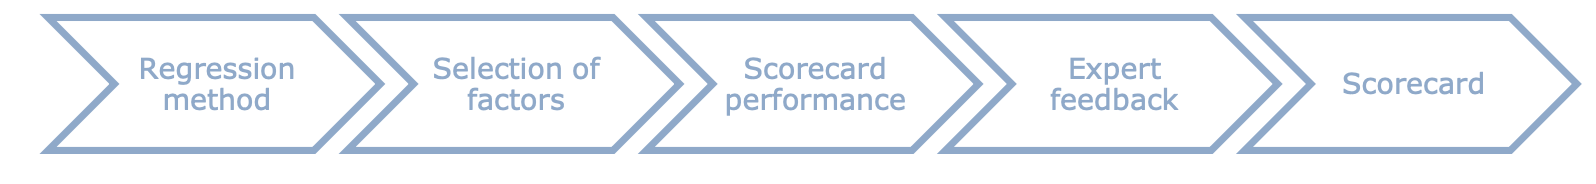

<p style='text-align: justify;'> The first step of the multi-factor analysis is to select a regression method. Here, I will use the cox-ph model for regression purposes.</p>

<p style='text-align: justify;'> The selection of factors consists of two steps: the stepwise multifactor analysis and sampling. The stepwise multifactor analysis finds the best set of predicting variables given a dataset. Next, is sampling used to generate subsets of the total dataset and come up with a robust model.</p>

<p style='text-align: justify;'> Once the features are selected and the model performs well on the test samples, it should be tested whether it also performs well on other subsamples.</p>

<p style='text-align: justify;'> Next step is feedback from experts. If experts strongly disagree with the statistical model, the weights can be changed accordingly to the experts. If the difference between the two models is not significant, the model with the new expert weights is selected, otherwise, the results should be discussed with the experts.</p>

<p style='text-align: justify;'> From a practical point of view, the main task of multifactor analysis is to select the best set of a given feature to be used in the final modeling. The multifactor analysis starts with explaining the different types of stepwise regression used to find the best set of factors from a dataset. Next, the selection of the final set of factors is explained and finally, the PD can be calculated by incorporating the selected factors in the model.  In the following, I will briefly give an overview of the methods which can be utilized in the best set of the features selection procedure.</p>

### <p style='text-align: justify;'> Stepwise regression </p>
<p style='text-align: justify;'> Stepwise regression is used to find the best set of predicting variables. Different regression technique can adopted for survival analysis. The most commonly used are backward elimination, forward selection, and selection-elimination regression. </p>

### <p style='text-align: justify;'> Backward elimination </p>
<p style='text-align: justify;'> Backward elimination starts with all factors and deleting them one at a time. First, the least predicting factor is removed based on the p-value. The p-value is calculated as the Wald test statistic and is used to test the true value of the parameter based on the sample estimate. The factor with the highest p-value that is above the significance level (typically 0.05) is removed and the model has fitted again until only significant factors remain. This process is called backward elimination. </p>

The process steps:
* <p style='text-align: justify;'> 1. First a Cox-PH model is fitted with all factors on the goal variable and create a list with all the p-values. </p>
* <p style='text-align: justify;'> 2. Next, compare the p-values. The highest p-value that is above the significance level is removed from the list with selected variables. The significance level is usually set at 0.05. </p>

* <p style='text-align: justify;'> 3. If one of the factors becomes counterintuitive the factor is removed. Intuitive means that if a
positive influence on the score is expected also a positive coefficient should come out of the regression. </p>

* <p style='text-align: justify;'> 4. Repeat Steps 1-3 with the remainder of the variables until all variables have a p-value lower than the significance level. The main disadvantage of this model is the efficiency of the model. This factor selection procedure demands a lot of time if many factors are present. </p>

### <p style='text-align: justify;'> Forward Selection </p>
<p style='text-align: justify;'> The forward selection starts with selecting the most significant factor for predicting the outcome. In each following step, one factor is added that has the lowest p-value and a p-value lower compared to the significance level. The procedure is given by: </p>

* <p style='text-align: justify;'> 1. First, a standalone regression of all the individual factors on the goal variable is performed, and create a list with all the p-values. </p>

* <p style='text-align: justify;'> 2. Next, compare the p-values and the lowest p-value that is below the significance level is added to the list with selected variables. The significance level is usually set at 0.05. </p>

* <p style='text-align: justify;'> 3. If one of the selected factors has a p-value below the threshold or becomes counter intuitive it is deleted. </p>

* <p style='text-align: justify;'> 4. Fit a Cox model with the selected variables and each individual remaining factors. </p>

* <p style='text-align: justify;'> 5. Repeat Step 2 - 4 until no further factors meet the requirements from Step 2. </p>

<p style='text-align: justify;'> This process has one a main advantage: the performance. This process is efficient compared to, for example, backward elimination which results in a faster factor selection process. A disadvantage of this process is that it often selects too many factors which are often correlated. </p>


### <p style='text-align: justify;'> Selection-Elimination Regression </p>
<p style='text-align: justify;'> The selection elimination regression is developed for the survival model as well. The selection elimination regression multifactor analysis selects step-by-step the most predictive factors: </p>

* <p style='text-align: justify;'> 1. First a standalone regression of all the individual factors on the goal variable is done. </p>

* <p style='text-align: justify;'> 2. A list is created for all the factors that have an intuitive coefficient and a p-value below the significance level set by the modeler. Usually, a significance level of 0.05 is chosen. </p>

* <p style='text-align: justify;'> 3. Select the factor with the lowest AIC value from the list created in Step 2. </p>

* <p style='text-align: justify;'> 4. Do a combined regression of the previous selected factors, combined with the other individual factors. </p>

* <p style='text-align: justify;'> 5. Repeat Step 2 until no further factors meet the requirements from Step 2. </p>

* <p style='text-align: justify;'> 6. If one of the previously selected factors has a p-value below the threshold or becomes counterintuitive it is deleted. </p>

* <p style='text-align: justify;'> 7. The AIC value of the previous regression round is compared with the new AIC values. If the AIC value of the previous round is better than the new round, the factors of the previous round are
chosen and the regression stops. </p>

* <p style='text-align: justify;'> 8. In case the new AIC is better, the factor with the lowest combined AIC value is selected from the list created in Step 2. </p>

* <p style='text-align: justify;'> 9. Repeat Step 4 to 8 until no further factors meet the requirements from Step 2. </p>

### <p style='text-align: justify;'> Preliminaries </p>
<p style='text-align: justify;'> In the previous section, I already mentioned using of survival analysis as a theoritical framework but the natural question migh raise would be, What is the survival analysis?. Answering to this quite simple question might not be easy at all because there are very solid theoritical background for the survival analysis and its pros and cons as well as its application in a real-life problems. However, inorder to have a feelling and having the hands dirty on, I will try to briefly give some information regarding the survival analysis. In the following I will present a very brief introduction to the survival function which is borrowed fro <a href="https://thomaselove.github.io/432-notes/exploring-time-to-event-survival-data.html">here</a>.</p>

* <p style='text-align: justify;'> Survival analysis theory </p>

#### <p style='text-align: justify;'> Introduction to survival analysis </p>
<p style='text-align: justify;'> Survival analysis is a collection of methods to analyse time to event data. A key part of survival analysis is the modeling of the contribution of censored observations to model likelihood. Censored observations are those for which we have not observed the event (also called right-censoring). The event could be the death of a patient, diagnosis of a disease, failure of a machine part and in this analysis, it is defined as the end of terrorist groups. In the dataset that we will use, not all terrorist groups ended until the end of the observation period. Survival analysis is a suitable method to analyze the factors that influence the time to end of these groups. One very important assumption of survival analysis is that the time to event for censored terror groups does not systematically differ from those whose end we have observed. </p>

##### <p style='text-align: justify;'> Applications </p>

<p style='text-align: justify;'> Traditionally, survival analysis was developed to measure lifespans of individuals. An actuary or health professional would ask questions like "how long does this population live for?", and answer it using survival analysis. For example, the population may be a nation's population (for actuaries), or a population stricken by a disease (in the medical professional's case). Traditionally, sort of a morbid subject.</p>

<p style='text-align: justify;'> But survival analysis can be applied to not only births and deaths, but any duration. Medical professionals might be interested in the time between childbirths, where a birth in this case is the event of having a child, and a death is becoming pregnant again! (obviously, we are loose with our definitions of birth and death) Another example is users subscribing to a service: a birth is a user who joins the service, and a death is when the user leaves the service. </p>

##### <p style='text-align: justify;'> Censoring </p>

<p style='text-align: justify;'> At the time you want to make inferences about durations, it is possible that not all the death events have occurred yet. For example, a medical professional will not wait 50 years for each individual in the study to pass away before investigating -- he or she is interested in making decisions after only a few years, or months possibly. </p>

<p style='text-align: justify;'> The individuals in a population who have not been subject to the death event are labeled as right-censored, i.e., we did not (or can not) view the rest of their life history due to some external circumstances. All the information we have on these individuals are their current lifetime durations (which is naturally less than their actual lifetimes). </p>


Note

There is also left-censoring and interval censoring, which are expanded on later.

<p style='text-align: justify;'> A common mistake data analysts make is choosing to ignore the right-censored individuals. We will see why this is a mistake next.</p>

<p style='text-align: justify;'> Consider a case where the population is actually made up of two subpopulations, A and B. Population A has a very small lifespan, say 2 months on average, and population B enjoys a much larger lifespan, say 12 months on average. We don't know this distinction beforehand. At t=10, we wish to investigate the average lifespan for the entire population.</p>

<p style='text-align: justify;'> In the figure below, the red lines denote the lifespan of individuals where the death event has been observed, and the blue lines denote the lifespan of the right-censored individuals (deaths have not been observed). If we are asked to estimate the average lifetime of our population, and we naively decided to not included the right-censored individuals, it is clear that we would be severely underestimating the true average lifespan.</p>

Observed lifetimes at time 10:
 [ 5.21778914 10.          0.86726153  6.47380486  2.70377484  0.30296215
  3.9024563   0.180733    0.71760121  7.76293498  5.38549439 10.
  2.08617826 10.          6.54872016  2.86321743  2.8817474   1.40492355
  1.44857268  1.23669482 10.         10.         10.          0.07253985
  0.41712934]


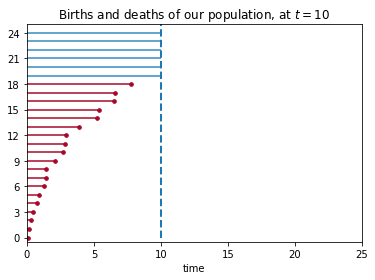

In [1]:
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = 25

CURRENT_TIME = 10

actual_lifetimes = np.array([
    exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)
])
observed_lifetimes = np.minimum(actual_lifetimes, CURRENT_TIME)
death_observed = actual_lifetimes < CURRENT_TIME

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

ax.set_xlim(0, 25)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)

<p style='text-align: justify;'> Example lifetimes of individuals. We only observe up to time 10, but the blue individuals have not died yet (i.e. they are censored).</p>

<p style='text-align: justify;'> Furthermore, if we instead simply took the mean of all lifespans, including the current lifespans of right-censored instances, we would still be underestimating the true average lifespan. Below we plot the actual lifetimes of all instances (recall we do not see this information at t=10). </p>

(0.0, 25.0)

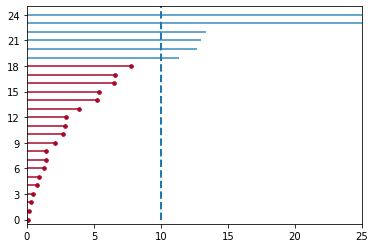

In [2]:
ax = plot_lifetimes(actual_lifetimes, event_observed=death_observed)
ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlim(0, 25)

<p style='text-align: justify;'> Revealing the actual lifetimes of individuals. </p>


<p style='text-align: justify;'> Survival analysis was originally developed to solve this type of problem, that is, to deal with estimation when our data is right-censored. However, even in the case where all events have been observed, i.e. there is no censoring, survival analysis is still a very useful tool to understand durations and rates. </p>

<p style='text-align: justify;'> The observations need not always start at zero, either. This was done only for understanding in the above example. Consider the example where a customer entering a store is a birth: a customer can enter at any time, and not necessarily at time zero. In survival analysis, durations are relative: individuals may start at different times. (We actually only need the duration of the observation, and not necessarily the start and end time.) </p>

<p style='text-align: justify;'> We next introduce the three fundamental objects in survival analysis, the survival function, hazard function and the cumulative hazard function. </p>

##### <p style='text-align: justify;'> Survival function </p>

<p style='text-align: justify;'> Let T be a (possibly infinite, but always non-negative) random lifetime taken from the population under study. For example, the amount of time a couple is married. Or the time it takes a user to enter a webpage (an infinite time if they never do). The survival function - $S(t)$ - of a population is defined as </p>

$$ S(t) = Pr(T > t)$$


<p style='text-align: justify;'> Simply, the survival function defines the probability the death event has not occurred yet at time t, or equivalently, the probability of surviving past time t. Note the following properties of the survival function: </p>


<p style='text-align: justify;'> Simply, the survival function defines the probability the death event has not occurred yet at time t, or equivalently, the probability of surviving past time t. Note the following properties of the survival function: </p>

* <p style='text-align: justify;'> $0 \le S(t) \le 1$ </p>
* <p style='text-align: justify;'> $F(t) = 1 - S(t)$, where $F(t)$ is the CDF of T, which implies</p>
* <p style='text-align: justify;'> $S(t)$ is a non-increasing function of t. </p>
<p style='text-align: justify;'> Here's an example of a survival function: </p>





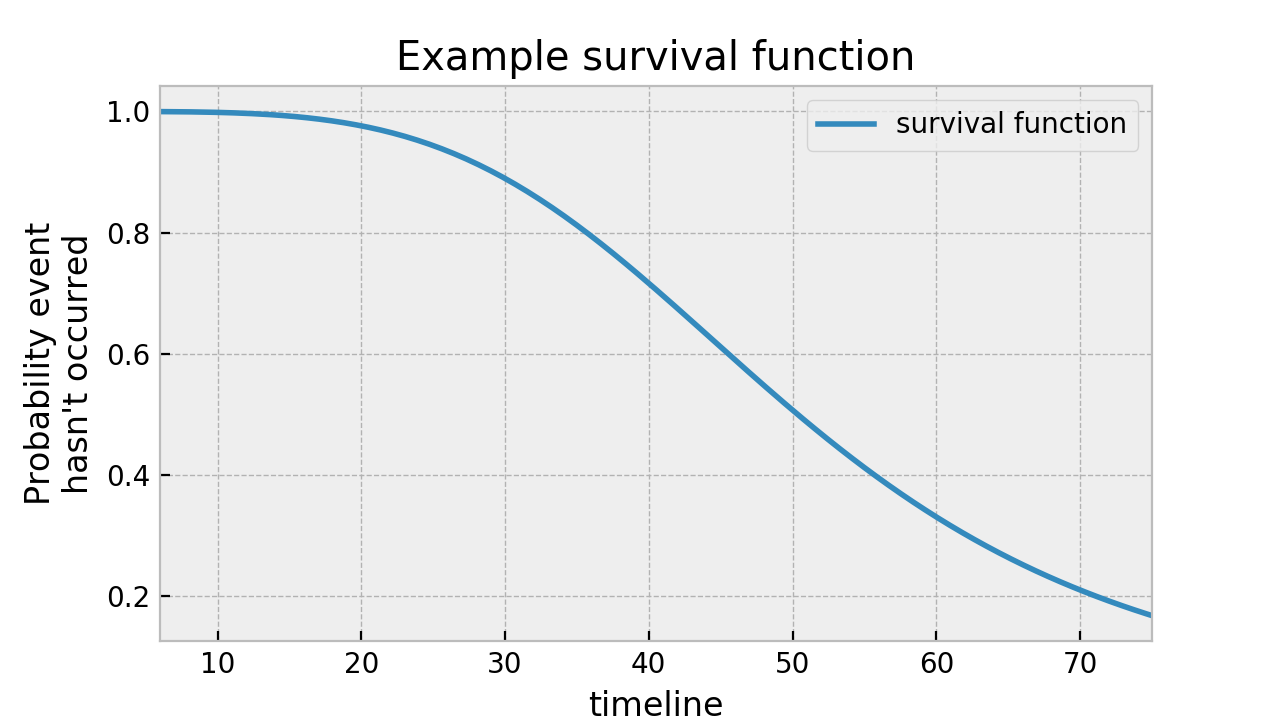


<p style='text-align: justify;'> Reading from this graph, we can see that at time 40, about 75% of the population is still alive.</p>


##### <p style='text-align: justify;'> Hazard function </p>

<p style='text-align: justify;'> We are also interested in the probability of the death event occurring at time t, given that the death event has not occurred yet. Mathematically, that is: </p>

$$\lim_{\delta t \rightarrow 0 } \; Pr( t \le T \le t + \delta t | T > t)$$


<p style='text-align: justify;'> This quantity goes to 0 as $\delta t$ shrinks, so we divide this by the interval $\delta t$ (like we might do in calculus). This defines the hazard function at time $t$, $h(t)$: </p>

$$h(t) =  \lim_{\delta t \rightarrow 0 } \; \frac{Pr( t \le T \le t + \delta t | T > t)}{\delta t}$$

It can be shown that this is equal to:

$$h(t) = \frac{-S'(t)}{S(t)}$$

and solving this differential equation (cool, it is a differential equation!), we get:

$$S(t) = \exp\left( -\int_0^t h(z) \mathrm{d}z \right)$$

The integral has a more common name: the cumulative hazard function, denoted $H(t)$. We can rewrite the above as:

$$S(t) = \exp\left(-H(t) \right)$$

With that, the two figures below represent the hazard and the cumulative hazard, respectively, of the survival function in the figure above.

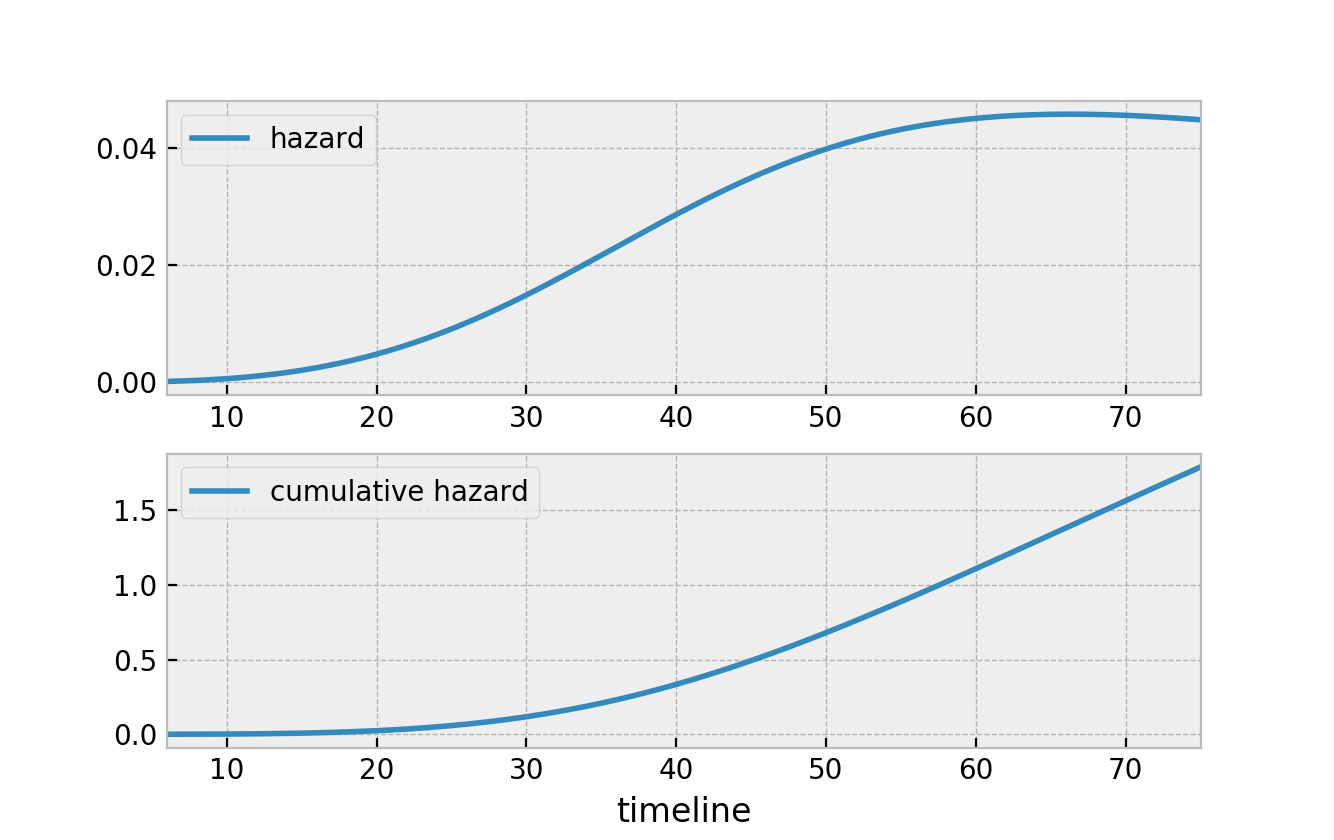

<p style='text-align: justify;'> What I like about the above relationships is that it defines all survival functions. Notice that we can now speak either about the survival function, S(t), the hazard, h(t), or the cumulative hazard function, H(t), and we can convert back and forth quite easily. More detailed information can be found here <a href="https://thomaselove.github.io/432-notes/exploring-time-to-event-survival-data.html">here</a>.

## Loading required libraries
<p style='text-align: justify;'> Once the preliminary study is done and the framework is selected, it is time to think about the required tools to pursue in the implementation of the model. For example, since we will use the survival analysis method for predicting time to the default of the borrowers, the functions such as KaplanMeierFitter, ExponentialFitter, WeibullFitter, CoxPHFitter which are implemented in the lifeline library of Python are imported. </p>

In [3]:
# Pandas and Array functions
import numpy as np
import pandas as pd

#Plot-related libraries
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(rc = {'figure.figsize' : (14,10)}, font_scale = 1.5)


# Ploty library for the purpose of plot
import plotly.express as px
import plotly.graph_objs as go

from optbinning import OptimalBinning

# Survival analysis-related libraries
from lifelines import KaplanMeierFitter, ExponentialFitter, WeibullFitter, CoxPHFitter

#logrank_test
from lifelines.statistics import logrank_test

from IPython.core.display import display, HTML

<p style='text-align: justify;'> Once the required libraries are ready, naturally the next step is loading the dataset and starting to apply the model. Although, before starting using the given dataset as raw material, investigation of a given dataset is always beneficial. In the following few cells, I will try to do some data cleaning to make it ready to be used in the model. This stage can be considered equivalent to the data stage which was earlier introduced as a first step of PD modeling. </p>

In [4]:
Data = pd.read_csv('mortgage.csv', low_memory = False)

In [5]:
#Data = Data.apply(pd.to_numeric, errors = 'coerce')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622489 entries, 0 to 622488
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       622489 non-null  int64  
 1   time                     622489 non-null  int64  
 2   orig_time                622489 non-null  int64  
 3   first_time               622489 non-null  int64  
 4   mat_time                 622489 non-null  int64  
 5   balance_time             622489 non-null  float64
 6   LTV_time                 622219 non-null  float64
 7   interest_rate_time       622489 non-null  float64
 8   hpi_time                 622489 non-null  float64
 9   gdp_time                 622489 non-null  float64
 10  uer_time                 622489 non-null  float64
 11  REtype_CO_orig_time      622489 non-null  int64  
 12  REtype_PU_orig_time      622489 non-null  int64  
 13  REtype_SF_orig_time      622489 non-null  int64  
 14  inve

In [6]:
print('The shape of a given dataset is ({m},{n})'.format(m = Data.count()[0], n = len(Data.columns)))

The shape of a given dataset is (622489,23)


# Dataset

<p style='text-align: justify;'> The data set mortgage is in panel form and reports origination and performance observations for 50,000 residential U.S. mortgage borrowers over 60 periods. The periods have been de-identified. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The loan observations may thus be censored as the loans mature or borrowers refinance. The data set is a randomized selection of mortgage-loan-level data collected from the portfolios underlying U.S. residential mortgage-backed securities (RMBS) securitization portfolios and provided by Inter-national Financial Research (www.internationalfinancialresearch.org). Key variables include:  The data set mortgage is in panel form and reports origination and performance observations for 50,000 residential U.S. mortgage borrowers over 60 periods. The periods have been de-identified. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The loan observations may thus be censored as the loans mature or borrowers refinance. The data set is a randomized selection of mortgage-loan-level data collected from the portfolios underlying U.S. residential mortgage-backed securities (RMBS) securitization portfolios and provided by Inter-national Financial Research (www.internationalfinancialresearch.org). Key variables include: The data set mortgage is in panel form and reports origination and performance observations for 50,000 residential U.S. mortgage borrowers over 60 periods. The periods have been de-identified. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The loan observations may thus be censored as the loans mature or borrowers refinance. The data set is a randomized selection of mortgage-loan-level data collected from the portfolios underlying U.S. residential mortgage-backed securities (RMBS) securitization portfolios and provided by Inter-national Financial Research (www.internationalfinancialresearch.org). Key variables include: The data set mortgage is in panel form and reports origination and performance observations for 50,000 residential U.S. mortgage borrowers over 60 periods. The periods have been de-identified. As in the real world, loans may originate before the start of the observation period (this is an issue where loans are transferred between banks and investors as in securitization). The loan observations may thus be censored as the loans mature or borrowers refinance. The data set is a randomized selection of mortgage-loan-level data collected from the portfolios underlying U.S. residential mortgage-backed securities (RMBS) securitization portfolios and provided by Inter-national Financial Research (www.internationalfinancialresearch.org). Key variables include:</p>

<p style='text-align: justify;'>
    
* id: borrower id
* time: time stamp of observation
* orig_time: time stamp for origination
* first_time: time stamp for first observation
* mat_time: time stamp for maturity
* balance_time: outstanding balance at observation time
* LTV_time: loan to value ratio at observation time, in %
* interest_rate_time: interest rate at observation time, in %
* hpi_time: house price index at observation time, base year=100
* gdp_time: GDP growth at observation time, in %
* uer_time: unemployment rate at observation time, in %
* REtype_CO_orig_time: real estate type condominium: 1, otherwise: 0
* REtype_PU_orig_time: real estate type planned urban developments: 1, otherwise: 0
* REtype_SF_orig_time: single family home: 1, otherwise: 0
* investor_orig_time: investor borrower: 1, otherwise: 0  
* balance_orig_time: outstanding balance at origination time
* FICO_orig_time: FICO score at origination time, in %
* LTV_orig_time: loan to value ratio at origination time, in %
* Interest_Rate_orig_time interest rate at origination time, in %
* hpi_orig_time: house price index at observation time, base year=100
* default_time: default observation at observation time
* payoff_time: payoff observation at observation time
* status_time: default (1), payoff (2) and non-default/non-payoff (0) observation at observation time</p>

## First step : Data section

In [7]:
Data.head()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
0,1,25,-7,25,113,41303.42,24.498336,9.2,226.29,2.899137,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
1,1,26,-7,25,113,41061.95,24.483867,9.2,225.10,2.151365,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
2,1,27,-7,25,113,40804.42,24.626795,9.2,222.39,2.361722,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
3,1,28,-7,25,113,40483.89,24.735883,9.2,219.67,1.229172,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0
4,1,29,-7,25,113,40367.06,24.925476,9.2,217.37,1.692969,...,1,0,45000.0,715,69.4,9.2,87.03,0,0,0


In [8]:
Data.tail()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
622484,50000,56,16,52,177,517107.42,57.659403,2.664,181.43,1.717053,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622485,50000,57,16,52,177,512274.57,55.359916,2.652,187.20,2.556052,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622486,50000,58,16,52,177,507396.72,54.492206,2.644,188.37,2.868594,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622487,50000,59,16,52,177,502478.87,54.171106,2.638,187.65,2.443648,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0
622488,50000,60,16,52,177,497521.35,53.023479,2.635,189.82,2.836358,...,0,0,664000.0,653,80.0,1.75,167.91,0,0,0


In [9]:
# Have a summary of a given dataset in one shot.
Data.describe()

,id,time,orig_time,first_time,mat_time,balance_time,LTV_time,interest_rate_time,hpi_time,gdp_time,...,REtype_SF_orig_time,investor_orig_time,balance_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,hpi_orig_time,default_time,payoff_time,status_time
count,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,6.224890e+05,622219.000000,622489.000000,622489.00000,622489.000000,...,622489.000000,622489.000000,6.224890e+05,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000,622489.000000
mean,25147.492561,35.800806,20.570057,24.607362,137.206527,2.459649e+05,83.078239,6.702451,184.10245,1.381032,...,0.612067,0.138226,2.562539e+05,673.616922,78.975460,5.649546,198.115217,0.024351,0.042714,0.109779
std,13750.200051,11.579971,7.615170,6.739015,19.532501,2.141563e+05,24.968839,2.079246,27.65077,1.964645,...,0.487280,0.345137,2.197181e+05,71.724558,10.127052,2.978061,33.964785,0.154135,0.202212,0.427967
min,1.000000,1.000000,-40.000000,1.000000,18.000000,0.000000e+00,0.000000,0.000000,107.83000,-4.146711,...,0.000000,0.000000,0.000000e+00,400.000000,50.100000,0.000000,75.710000,0.000000,0.000000,0.000000
25%,13580.000000,27.000000,18.000000,21.000000,137.000000,1.020174e+05,67.109446,5.650000,158.60000,1.104163,...,0.000000,0.000000,1.080000e+05,626.000000,75.000000,5.000000,179.450000,0.000000,0.000000,0.000000
50%,24881.000000,34.000000,22.000000,25.000000,142.000000,1.806183e+05,82.253269,6.625000,180.52000,1.850689,...,1.000000,0.000000,1.880000e+05,678.000000,80.000000,6.290000,216.770000,0.000000,0.000000,0.000000
75%,37045.000000,44.000000,25.000000,28.000000,145.000000,3.374950e+05,100.634381,7.875000,212.73000,2.694111,...,1.000000,0.000000,3.520000e+05,729.000000,80.000000,7.456000,222.390000,0.000000,0.000000,0.000000
max,50000.000000,60.000000,60.000000,60.000000,229.000000,8.701859e+06,803.513550,37.500000,226.29000,5.132464,...,1.000000,1.000000,8.000000e+06,840.000000,218.500000,19.750000,226.290000,1.000000,1.000000,2.000000


<p style='text-align: justify;'> After the selection the factors should be checked upon correlation. Too highly correlated factors can lead to multicollinearity. In this case, two or more predicting variables can be linearly predicted from each other. As a result of this, the coefficient estimates can be unstable. This is that value of the coefficients can change substantially by removing only a few observations. In general, the final model should contain only risk factors, whose correlation coefficients are not too high, as an indication RMVM uses 75%. In case of higher correlations, this should be discussed with experts and preferably one of the highly correlated factors should be chosen. Hence, To prevent such as problem from the beginning as well as save time through single-factor analysis, it will be useful to investigate the correlation between the features of a given data set. The below cell calculates and illustrates the correlation matrix corresponding to a given data set. Here, I have set the threshold = 0.4. It means the graph shows only those correlations which are larger than 0.4. </p>

<AxesSubplot:>

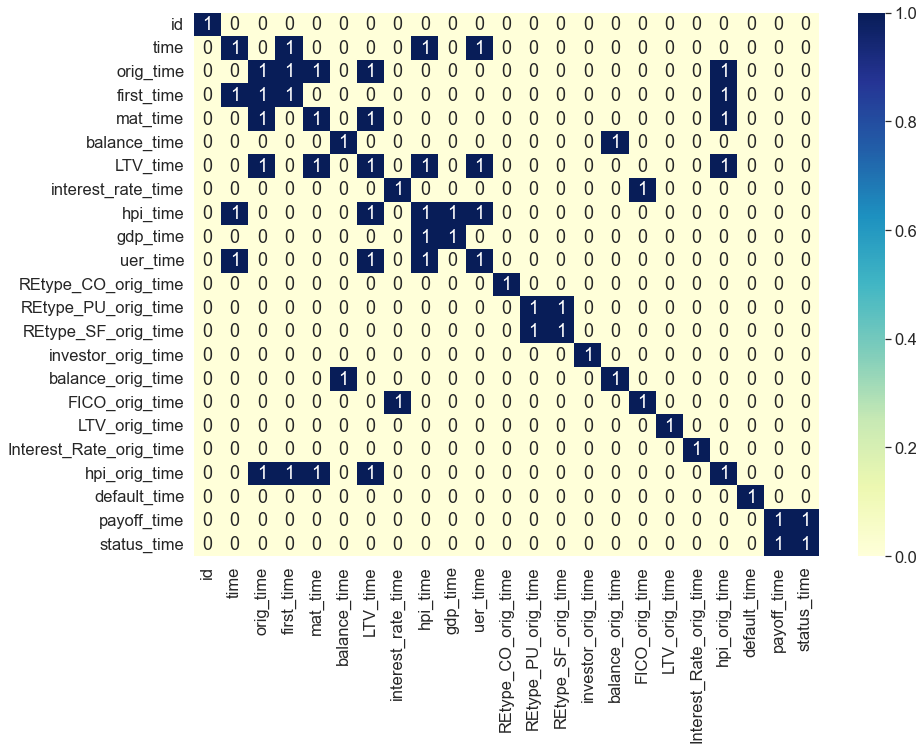

In [10]:
sns.heatmap(Data.corr().abs() > 0.4, annot = True, cmap = "YlGnBu")

<p style='text-align: justify;'> Once highly correlated features are known, then we can drop them from the dataset in the rest of the modeling processes. The below cell is the minimum list of those features which have to be removed to get an uncorrelated correlation matrix. </p>

In [11]:
Data.drop('LTV_time', axis = 1, inplace = True)
Data.drop('hpi_time', axis = 1, inplace = True)
Data.drop('hpi_orig_time', axis = 1, inplace = True)
Data.drop('payoff_time', axis = 1, inplace = True)
Data.drop('interest_rate_time', axis = 1, inplace = True)
Data.drop('uer_time', axis = 1, inplace = True)
Data.drop('balance_orig_time', axis = 1, inplace = True)
Data.drop('REtype_PU_orig_time', axis = 1, inplace = True)
Data.drop('first_time', axis = 1, inplace = True)
Data.drop('mat_time', axis = 1, inplace = True)

<AxesSubplot:>

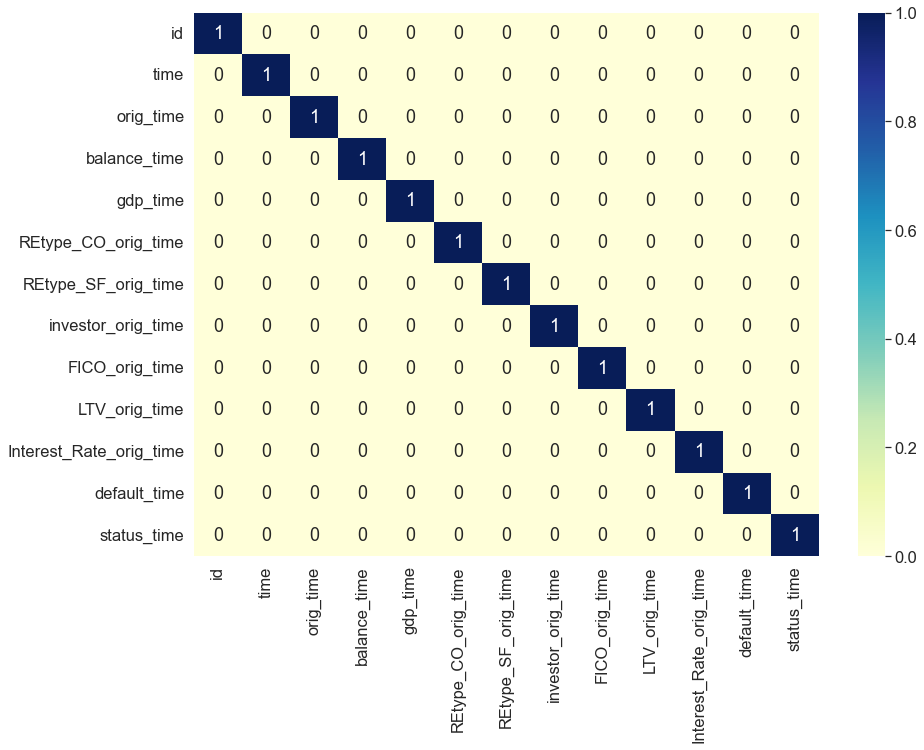

In [12]:
# Check the colinearity again
sns.heatmap(Data.corr().abs() > 0.4, annot = True, cmap = "YlGnBu")

In [13]:
# List of survived features
Data.columns.tolist()

['id',
 'time',
 'orig_time',
 'balance_time',
 'gdp_time',
 'REtype_CO_orig_time',
 'REtype_SF_orig_time',
 'investor_orig_time',
 'FICO_orig_time',
 'LTV_orig_time',
 'Interest_Rate_orig_time',
 'default_time',
 'status_time']

In [14]:
# The status feature, by its definition should be binary. In order to prepare the status feature to be used
# in the survival analysis, we convert the payoff (2) class into and non-default/non-payoff (0) class. 
Data['status_time'] = Data['status_time'].apply(lambda x: 0 if(x==2) else x)
Data['status_time'].unique()

array([0, 1])

### <p style='text-align: justify;'> Remark </p>

<p style='text-align: justify;'> In case which the probability of an event happening (here default) is given, the survival function and then the time to default can be calculated analytically, accordingly. the analytical solution might have some advantages over the numerical solutions. One of the main advantages of the analytical solution is, it is fast and accurate.  However, for real-world problems most of the time the probability distribution of time to event is not given. But still, there is room to keep going in this direction, because at least the histogram of time to event (can be considered as probability distribution) is available and plotting its histogram gives us some preliminary information about the nature of the histogram and then can guess (Needs to be expert in statistic otherwise the model might now work well as expected)and then applying the proper fitting methods (e.g., exponential, Weibull) will result in the calculation of the free parameters of the model. The below cell demonstrates the probability of distribution of the time to default in a given dataset. It is worth mentioning that in the following we will not use this method and we will use a semi-parametrized cox-ph model for the calculation of survival function.</p>


<p style='text-align: justify;'> As is shown in the below cell, the obtained distribution function looks symmetric and somehow close to the normal distribution. This preliminary information obtained from the group can be used to guess the proper distribution function for the fitting. </p>

Text(0, 0.5, 'Count')

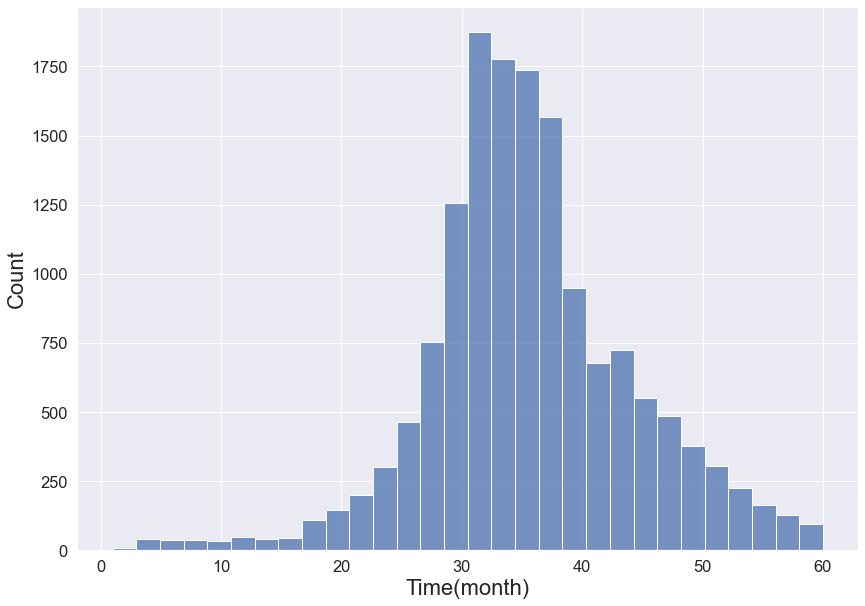

In [15]:
# Visualizing the probability distribution of time to default
PDF = Data[Data['status_time'] == 1]
ax  = sns.histplot(data = PDF, x = "time" , bins = 30)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("Count"      , fontsize = 22)  

# Univariate Kaplam-Mierr estimation of the survival function
<p style='text-align: justify;'> Regarding my experiences in the modeling of some problems in the field of condensed matter physics and some data science and machine learning methods, having a general intuition around the solution always helps the modeler to design more efficient procedures to implement and obtain more accurate results. To this end, before exploring further the calculation of the survival function for a given feature. I would like to apply the Kaplan-Meier estimation of the survival function which only considers the time variable and status. Because it does not consider the effect of the covariates, it only provides a rough estimation of the survival function of the portfolio. The below cell indicates the Kaplan-Mierr estimation of the survival function of the portfolio. </p>

Text(0, 0.5, 'S(t)')

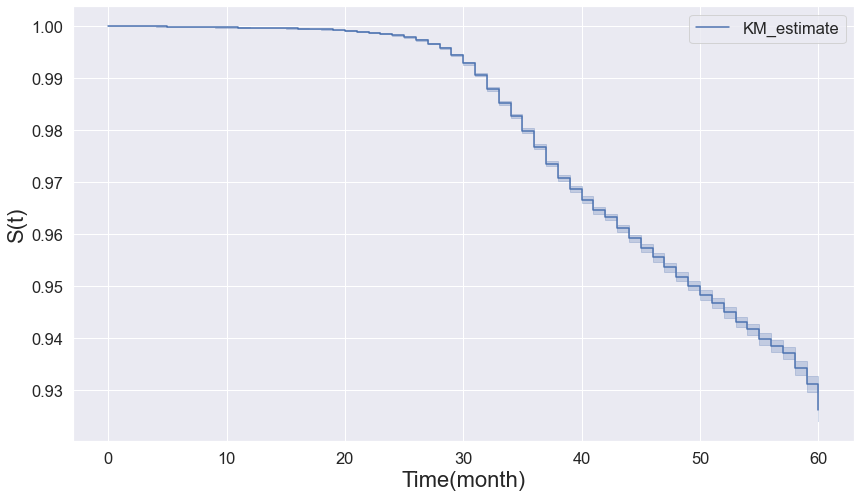

In [16]:
# # Create Object of Kaplan-Meier Fitter
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()

kmf_mortgage = KaplanMeierFitter().fit(Data['time'], Data['status_time'])
ax = kmf_mortgage.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

## Second step: Single-factor analysis

<p style='text-align: justify;'> As explained above, once the data and required tools are ready, it is time to start to do single factor analysis. In what follows, we will apply the bucketing technique for each of those selected features. Please note that, since we are going just to establish a PD modeling, then there is no need to transform the obtained scores. We only will apply a bucketing technique. Bucketing can be done in some different ways such as equal interval binding, equal frequency binning. Here I will use optimal binning methods which automatically calculate the best set of boundaries for the bins. The more information regarding the optbinning python package can be found here <a href="http://gnpalencia.org/optbinning/">here</a>.
</p>

## orig_time

In [17]:
# First bucketing "orig_time" feature 
optb = OptimalBinning(name = 'orig_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['orig_time'], Data['status_time'])

OptimalBinning(name='orig_time')

In [18]:
# Calculated optimal bins and corresponding weigh of evidence and information values
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10.50)",44906,0.072139,44152,754,0.016791,0.379456,0.008711,0.001082
1,"[10.50, 14.50)",47513,0.076327,47097,416,0.008755,1.038734,0.052044,0.006228
2,"[14.50, 17.50)",61690,0.099102,61017,673,0.010909,0.816617,0.045786,0.005569
3,"[17.50, 18.50)",32645,0.052443,32257,388,0.011885,0.72994,0.020085,0.002456
4,"[18.50, 20.50)",61900,0.099440,60990,910,0.014701,0.514475,0.020779,0.002569
5,"[20.50, 21.50)",36172,0.058109,35400,772,0.021342,0.134937,0.000993,0.000124
6,"[21.50, 22.50)",45339,0.072835,44300,1039,0.022916,0.06218,0.000273,0.000034
7,"[22.50, 23.50)",38363,0.061628,37304,1059,0.027605,-0.12877,0.001087,0.000136
8,"[23.50, 24.50)",41628,0.066873,40424,1204,0.028923,-0.176771,0.002275,0.000284
9,"[24.50, 25.50)",57852,0.092937,55933,1919,0.033171,-0.318195,0.010979,0.001367


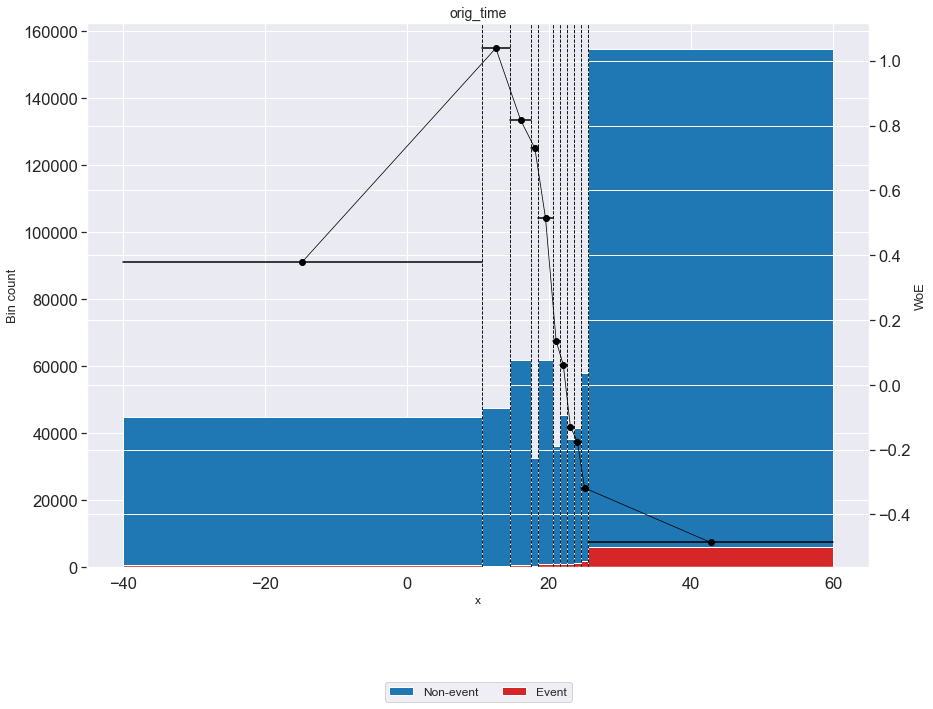

array([-inf, 10.5, 14.5, 17.5, 18.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5,
        inf])

In [19]:
# Combined plot of bincount and weight of evidence corresponding to each bin with actual boundaries
optb.binning_table.plot(metric="woe", style="actual", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [20]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [14.5, 17.5, 18.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5,]
user_splits_fixed = [False, False, False, False, False, False, False, False, False]

In [21]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'orig_time', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(Data['orig_time'], Data['status_time'])

OptimalBinning(name='orig_time',
               user_splits=[14.5, 17.5, 18.5, 20.5, 21.5, 22.5, 23.5, 24.5,
                            25.5],
               user_splits_fixed=array([False, False, False, False, False, False, False, False, False]))

In [22]:
# Calculated optimal bins and corresponding weight of evidence after merging some bins
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 18.50)",186754,0.300012,184523,2231,0.011946,0.724779,0.113532,0.013889
1,"[18.50, 20.50)",61900,0.099440,60990,910,0.014701,0.514475,0.020779,0.002569
2,"[20.50, 21.50)",36172,0.058109,35400,772,0.021342,0.134937,0.000993,0.000124
3,"[21.50, 22.50)",45339,0.072835,44300,1039,0.022916,0.06218,0.000273,0.000034
4,"[22.50, 23.50)",38363,0.061628,37304,1059,0.027605,-0.12877,0.001087,0.000136
5,"[23.50, 24.50)",41628,0.066873,40424,1204,0.028923,-0.176771,0.002275,0.000284
6,"[24.50, 25.50)",57852,0.092937,55933,1919,0.033171,-0.318195,0.010979,0.001367
7,"[25.50, inf)",154481,0.248167,148457,6024,0.038995,-0.486002,0.074345,0.009203
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


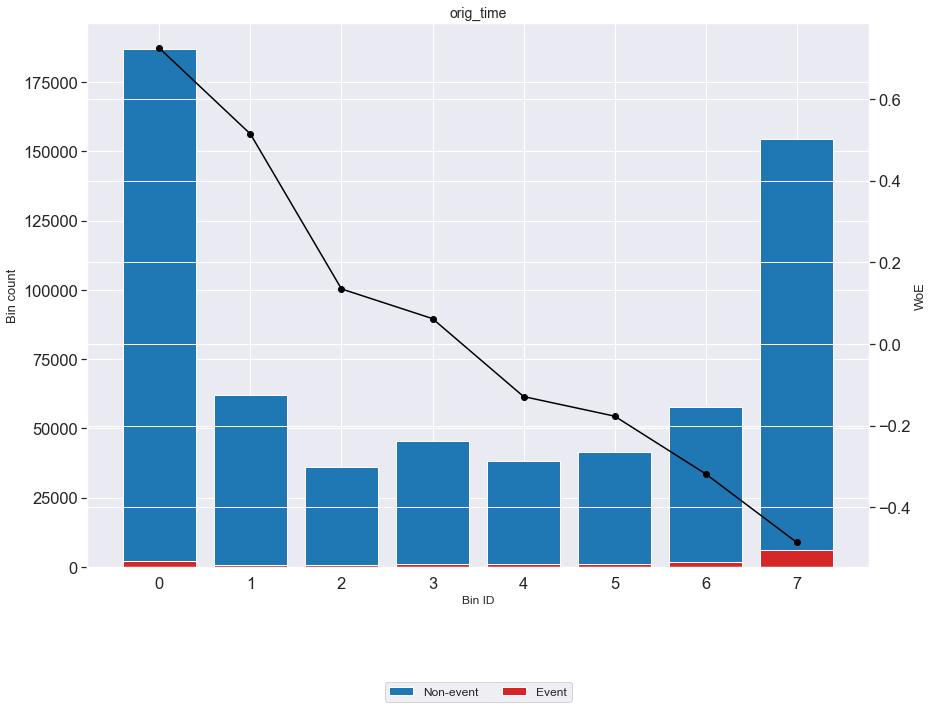

array([-inf, 18.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5,  inf])

In [23]:
# The calculated weight of evidence with the new bin boundaries show perfect uniformly increasing trend.
optb.binning_table.plot(metric = "woe", style = "bin", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [24]:
# As shown above, we have to repeat the rebucketing untill all of those bins have distinct
# weight of evidence (or survival function equivalently). Once rebucketing is done, we have to 
# convert the feature's values into categories based on the optimal bin boundaries. The "kategorizer"
# does this job such that it assighns a unique string label into each values they are belonging the same
# bins.
def kategorizer(df, feature, bins):
    saffix = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    names  = saffix[:len(bins)-1]
    df[feature] = pd.cut(df[feature], bins, labels = names)
    return df

In [25]:
# Please pay attention to the "orig_time" column and compare it with its original one.
Data  = kategorizer(Data, 'orig_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,41303.42,2.899137,0,1,0,715,69.4,9.20,0,0
1,1,26,A,41061.95,2.151365,0,1,0,715,69.4,9.20,0,0
2,1,27,A,40804.42,2.361722,0,1,0,715,69.4,9.20,0,0
3,1,28,A,40483.89,1.229172,0,1,0,715,69.4,9.20,0,0
4,1,29,A,40367.06,1.692969,0,1,0,715,69.4,9.20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,517107.42,1.717053,1,0,0,653,80.0,1.75,0,0
622485,50000,57,A,512274.57,2.556052,1,0,0,653,80.0,1.75,0,0
622486,50000,58,A,507396.72,2.868594,1,0,0,653,80.0,1.75,0,0
622487,50000,59,A,502478.87,2.443648,1,0,0,653,80.0,1.75,0,0


Text(0, 0.5, 'S(t)')

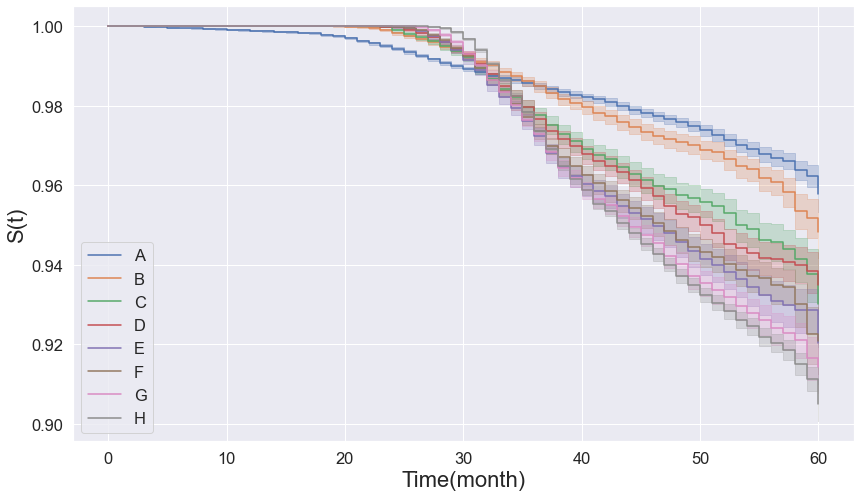

In [26]:
# As we discusse above, the distinctive weight of evidence for each bin will resulted in
# distinctive survival functions for each subcategories (I hope :)). However the claim can be approved
# by calculating the univariate survival function for each given subcategories. Below lines
# of code do this task.  IN the opposite cases, we have to regoing the similar bins to get the distinctive
# survival function for each bin. 

fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['orig_time'].sort_values().unique().tolist():
    data = Data[Data['orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)     

<p style='text-align: justify;'> As mentioned earlier, one of the most important goals of the single factor analysis is the bining of the features such that the corresponding survival functions have to be distinctive. In extreme cases in which the calculated survival functions are quite distinct such that they can be recognized by naked eyes, we can escape the Log-rank test applications. However, most of the time the distinguishability of the calculated survival functions can not be confirmed by naked eyes and we have to provide a more accurate measure. To do this, the Log-rank test can be done. The next natural question would be what it is and what it does?</p>

<p style='text-align: justify;'> From the plot above, it looks these two groups are quite similar in survival rate. The log-rank test compares the survival time by gender. It’s the most popular method of comparing the survival of patient groups that takes the whole follow-up period into account. Its big advantage is that we don’t need to know anything about the shape of the survival curve or the distribution of survival times. It’s based on a comparison of the observed numbers of deaths and the numbers of deaths expected if there were no difference in the probability of death between the groups (genders in this case) and uses a chi-squared test.</p>

<p style='text-align: justify;'> From the graph, it looks like the survival curve between some categories are very similar. Let's conduct a log-rank test to evaluate if it is true.</p>

* $H_0$: The two survival curves are identical (or S1t = S2t) versus 
* $H_1$: The two survival curves are not identical (or S1t ≠ S2t, at any time t) (α=0.05).

In [27]:
from lifelines.statistics import pairwise_logrank_test
# Helper function for printing out Log-rank test results
def print_logrank(col):
    log_rank = pairwise_logrank_test(Data['time'], Data[col], Data['status_time'])
    return log_rank.summary

In [28]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('orig_time').sort_values('p', ascending = True)

test_statistic       p  -log2(p)
A H       585.54548 0.00000 427.30680
  G       366.05793 0.00000 268.64260
B H       278.37195 0.00000 205.19424
  G       209.05303 0.00000 154.98632
A F       197.24272 0.00000 146.42543
  E       195.74228 0.00000 145.33764
B E       135.20676 0.00000 101.40680
  F       123.98007 0.00000  93.24686
A D        85.92430 0.00000  65.53585
B D        61.18706 0.00000  47.45314
A C        52.08269 0.00000  40.77331
C H        44.59591 0.00000  35.26503
B C        41.35175 0.00000  32.87267
D H        40.69714 0.00000  32.38946
C G        34.12110 0.00000  27.52477
D G        30.39151 0.00000  24.75547
C E        17.89911 0.00002  15.38975
D E        14.66270 0.00013  12.92521
C F        12.29724 0.00045  11.10620
D F         9.01466 0.00268   8.54451
F H         7.39945 0.00652   7.25994
  G         5.31915 0.02109   5.56714
E H         1.53201 0.21581   2.21216
  G         1.22631 0.26813   1.89902
  F         0.94780 0.33028   1.59824
C D         0.52432 0.46901   1.09232
A B         0.34216 0.55858   0.84015
G H         0.00000 0.99973   0.00039

<p style='text-align: justify;'> As is shown in the above table, the p-value between some categories are quite large (> 0.05) and it means there is a considerable amount of chance to accept the null-hypothesis and It means that they are not statistically significant. Hence, they can be merged. In the below cell, those labels which will be merged are listed for the replace function. After merging them we again will recalculate the survival functions for each of the new categories to check if the obtained survival functions are distinct or not. As the above graph shows the survival function of the survived categories are quite distinct even by naked eyes and hence, there is no need to repeat the same procedure (believe your eyes makes our life a lot easier:) )</p>

In [29]:
Data['orig_time']= Data['orig_time'].replace({'H':'E', 'G':'E', 'F':'E', 'D':'C', 'B':'A'})

Text(0, 0.5, 'S(t)')

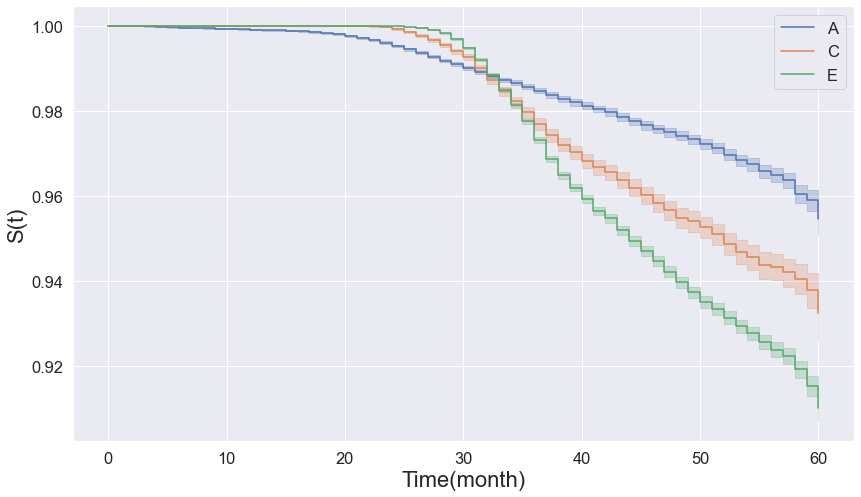

In [30]:
# As we discusse above, the distinctive weight of evidence for each bin will resulted in
# distinctive survival functions for each subcategories. However the claim can be approved
# by calculating the univariate survival function for each given subcategories. Below lines
# of code do this task.  
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['orig_time'].sort_values().unique().tolist():
    data = Data[Data['orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

### <p style='text-align: justify;'> Remark </p>

<p style='text-align: justify;'> As you might noticed, we have to apply the same procedure for the rest of the remaining features in a given dataset. However, besides a minimul touches which might be specific for each feature the procedure more or less will remain intact. For the sake of saving time, in what follows, I will just try to explain those part which are somehow new.</p>

## balance_time

In [31]:
# Bucketing the "balance_time" feature
optb = OptimalBinning(name = 'balance_time', dtype = "numerical", solver = "cp",\
                                                 monotonic_trend = "descending", )
optb.fit(Data['balance_time'], Data['status_time'])

OptimalBinning(monotonic_trend='descending', name='balance_time')

In [32]:
# Print the calculated bin boundaries and corresponding weight of evidence 
# as well as information values.
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 498755.17)",555690,0.89269,541940,13750,0.02474,-0.01643,0.00024,0.00003
1,"[498755.17, 612008.28)",34887,0.05604,34119,768,0.02201,0.10327,0.00057,0.00007
2,"[612008.28, inf)",31912,0.05127,31272,640,0.02006,0.19846,0.00184,0.00023
3,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
4,Missing,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
Totals,,622489,1.00000,607331,15158,0.02435,,0.00265,0.00033


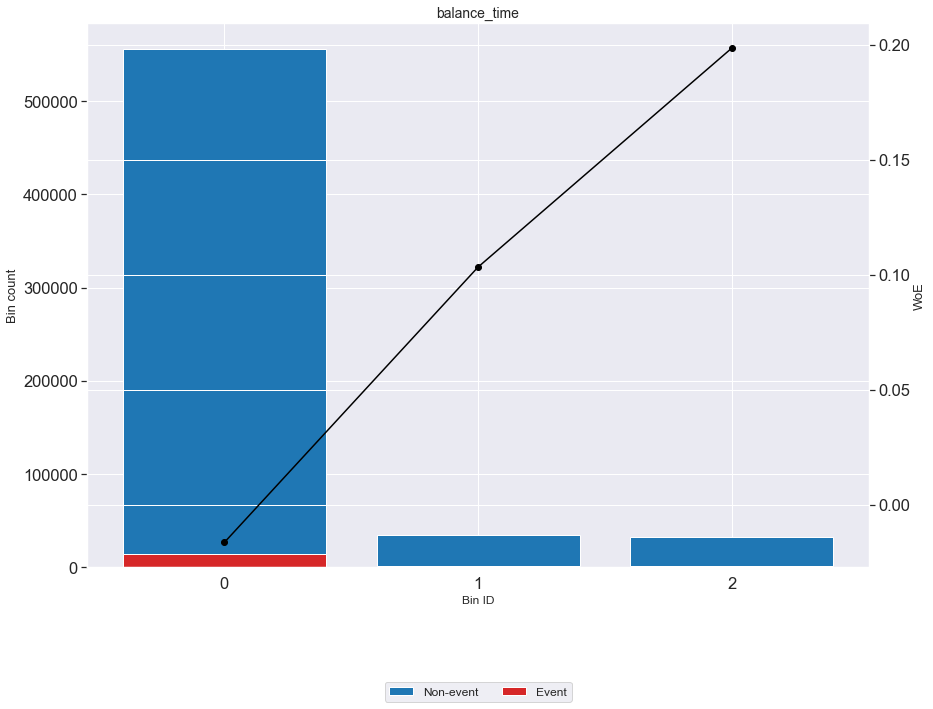

array([         -inf, 498755.171875, 612008.28125 ,           inf])

In [33]:
# Visualization of the calculated bins and corresponding weight of evidence
optb.binning_table.plot(metric="woe", style="bin", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [34]:
# As is shown in above cell, the calculated weight of evidence for those bins 
# betweeen [21.5, 27.5] are close to eachother so it makes a lot of scence to
# combine them. The new bin boundaries are listed in below.
user_splits =       [498755.171875,]
user_splits_fixed = [False, ]

In [35]:
# Rebucketing with new bin boundaries to see if we will see a uniform trend or not
optb = OptimalBinning(name = 'balance_time', dtype = "numerical", solver = "cp",
                      user_splits = user_splits, user_splits_fixed = user_splits_fixed)
optb.fit(Data['balance_time'], Data['status_time'])

OptimalBinning(name='balance_time', user_splits=[498755.171875],
               user_splits_fixed=array([False]))

In [36]:
# Printing the calculated weight of evidence and information value as well as 
# boundaries of the bins after merging last two bins.
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 498755.17)",555690,0.89269,541940,13750,0.02474,-0.01643,0.00024,0.00003
1,"[498755.17, inf)",66799,0.10731,65391,1408,0.02108,0.14767,0.00218,0.00027
2,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
3,Missing,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
Totals,,622489,1.00000,607331,15158,0.02435,,0.00243,0.00030


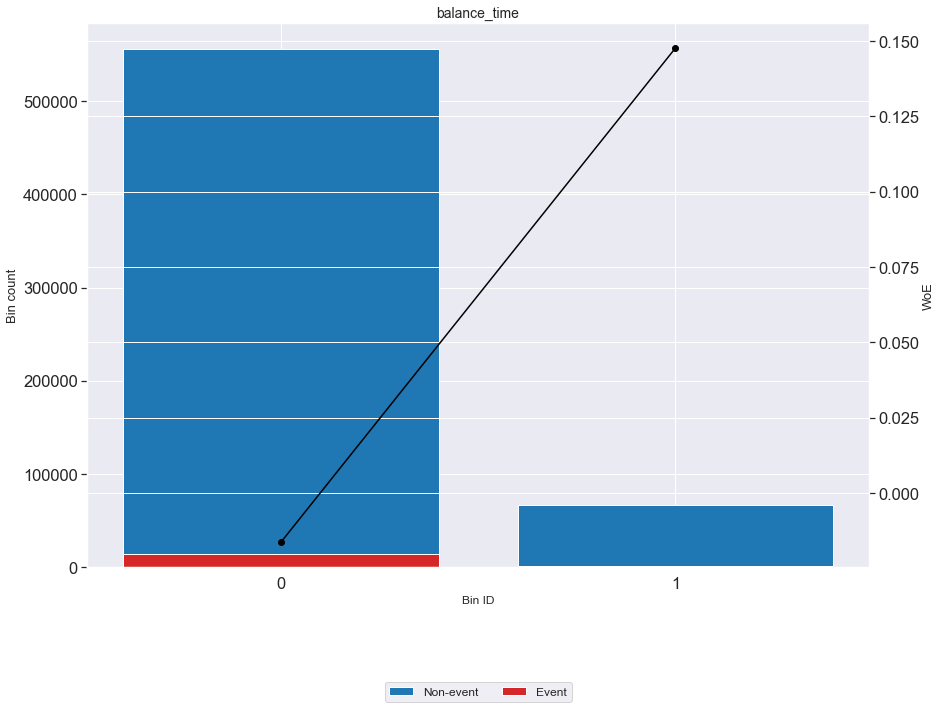

array([         -inf, 498755.171875,           inf])

In [37]:
# The calculated weight of evidence with the new bin boundaries show perfect uniformly increasing trend.
optb.binning_table.plot(metric = "woe", style = "bin", add_special = False, add_missing = False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [38]:
# Once we are happy with the calculated bin boundarie (seeing uniform trend). We can categorize the given
# feature based on finally obtained bin boundaries. Below line of code does this job. After applying this
# step, the feature "balance_time" will only have two A and B categories. 
Data  = kategorizer(Data, 'balance_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,2.89914,0,1,0,715,69.40000,9.20000,0,0
1,1,26,A,A,2.15136,0,1,0,715,69.40000,9.20000,0,0
2,1,27,A,A,2.36172,0,1,0,715,69.40000,9.20000,0,0
3,1,28,A,A,1.22917,0,1,0,715,69.40000,9.20000,0,0
4,1,29,A,A,1.69297,0,1,0,715,69.40000,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,1.71705,1,0,0,653,80.00000,1.75000,0,0
622485,50000,57,A,B,2.55605,1,0,0,653,80.00000,1.75000,0,0
622486,50000,58,A,B,2.86859,1,0,0,653,80.00000,1.75000,0,0
622487,50000,59,A,B,2.44365,1,0,0,653,80.00000,1.75000,0,0


Text(0, 0.5, 'S(t)')

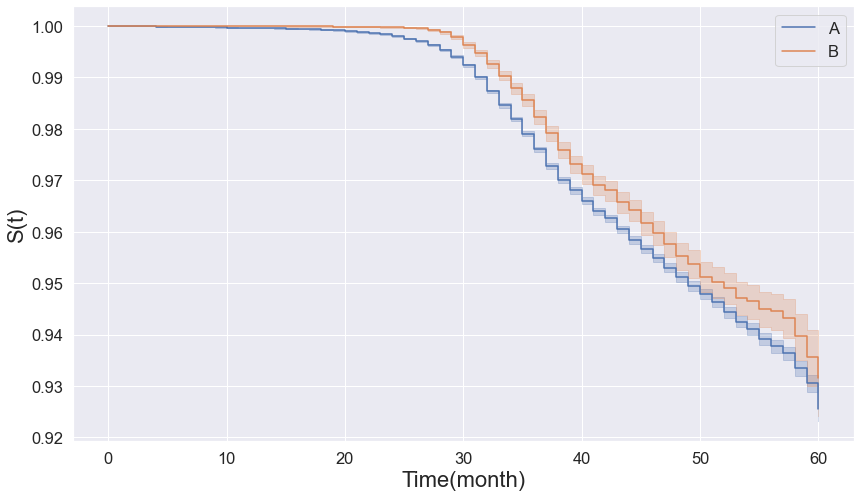

In [39]:
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['balance_time'].sort_values().unique().tolist():
    data = Data[Data['balance_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

<p style='text-align: justify;'> As is shown in above graph, the calculated survival function for given three subcategories are not looking quite distinctive with naked eyes.
Hence, in order to be completely sure, I will apply the LogRank test which provides quantitative measure to see if
a given pair of survival functions are statistically significant or not. </p>

In [40]:
# Just to prove we can rely on our feelling when the survival functions
# looks quite distinct with even naked eyes. The first felling from above graph is the two
# survival functions are distinctive and the obtianed p-value confirms it.
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('balance_time').sort_values('p', ascending = True)

,,test_statistic,p,-log2(p)
A,B,51.65371,0.00000,40.45812


## gdp_time

In [41]:
# Bucketing of the feature under title "gdp_time" by using optimal binning method
optb = OptimalBinning(name = 'gdp_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['gdp_time'], Data['status_time'])

OptimalBinning(name='gdp_time')

In [42]:
# Printing the calculated weight of evidence as well as bin boundaries
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -3.43)",35600,0.05719,33843,1757,0.04935,-0.73242,0.04408,0.00539
1,"[-3.43, -0.28)",55795,0.08963,53401,2394,0.04291,-0.58568,0.04100,0.00505
2,"[-0.28, 0.86)",38845,0.06240,37369,1476,0.03800,-0.45904,0.01645,0.00204
3,"[0.86, 1.14)",44843,0.07204,43525,1318,0.02939,-0.19333,0.00295,0.00037
4,"[1.14, 1.93)",161025,0.25868,157255,3770,0.02341,0.04025,0.00041,0.00005
5,"[1.93, 2.32)",49455,0.07945,48409,1046,0.02115,0.14417,0.00154,0.00019
6,"[2.32, 2.78)",101931,0.16375,99958,1973,0.01936,0.23465,0.00808,0.00101
7,"[2.78, 3.22)",88350,0.14193,87383,967,0.01095,0.81331,0.06513,0.00792
8,"[3.22, inf)",46645,0.07493,46188,457,0.00980,0.92525,0.04247,0.00513
9,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000


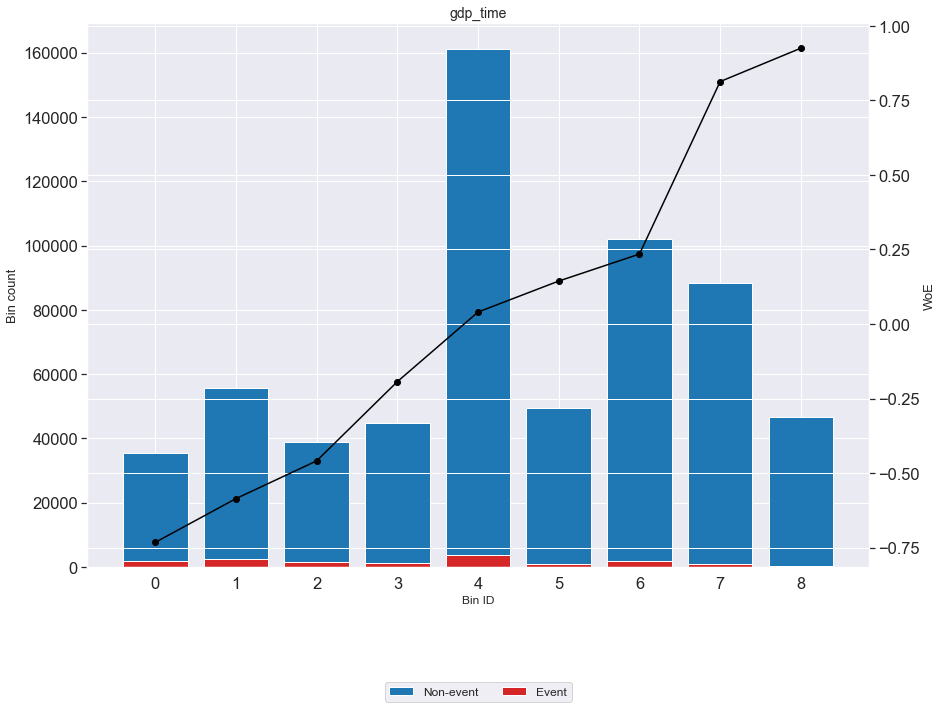

array([       -inf, -3.42805862, -0.27776421,  0.86492741,  1.14003593,
        1.93260318,  2.3179698 ,  2.77613044,  3.22186375,         inf])

In [43]:
# Visualization of above table
optb.binning_table.plot(metric="woe", style="bin", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [44]:
Data  = kategorizer(Data, 'gdp_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,H,0,1,0,715,69.40000,9.20000,0,0
1,1,26,A,A,F,0,1,0,715,69.40000,9.20000,0,0
2,1,27,A,A,G,0,1,0,715,69.40000,9.20000,0,0
3,1,28,A,A,E,0,1,0,715,69.40000,9.20000,0,0
4,1,29,A,A,E,0,1,0,715,69.40000,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,E,1,0,0,653,80.00000,1.75000,0,0
622485,50000,57,A,B,G,1,0,0,653,80.00000,1.75000,0,0
622486,50000,58,A,B,H,1,0,0,653,80.00000,1.75000,0,0
622487,50000,59,A,B,G,1,0,0,653,80.00000,1.75000,0,0


Text(0, 0.5, 'S(t)')

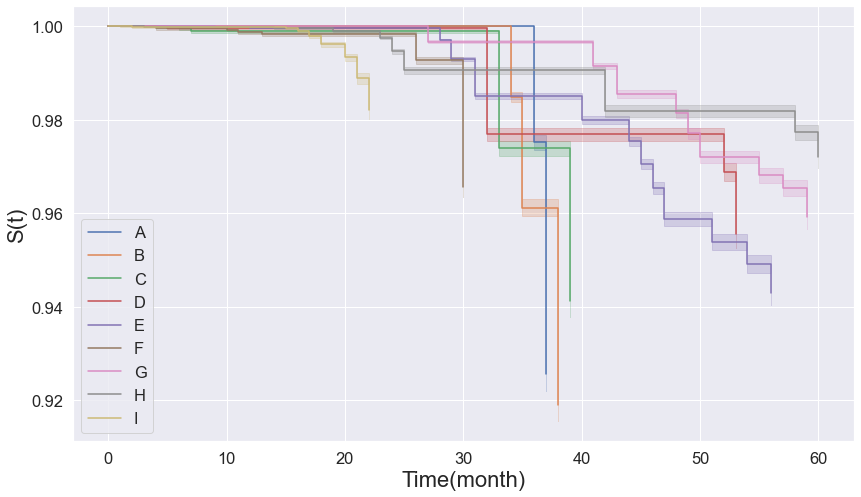

In [45]:
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['gdp_time'].sort_values().unique().tolist():
    data = Data[Data['gdp_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

## REtype_SF_orig_time

In [46]:
# Calculation of the optimal bins and corresponding weight of evidence and information values
optb = OptimalBinning(name = 'REtype_SF_orig_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['REtype_SF_orig_time'], Data['status_time'])

OptimalBinning(name='REtype_SF_orig_time')

In [47]:
# Printing the calculated table
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",241484,0.38793,235770,5714,0.02366,0.02939,0.00033,0.00004
1,"[0.50, inf)",381005,0.61207,371561,9444,0.02479,-0.01821,0.00020,0.00003
2,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
3,Missing,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
Totals,,622489,1.00000,607331,15158,0.02435,,0.00054,0.00007


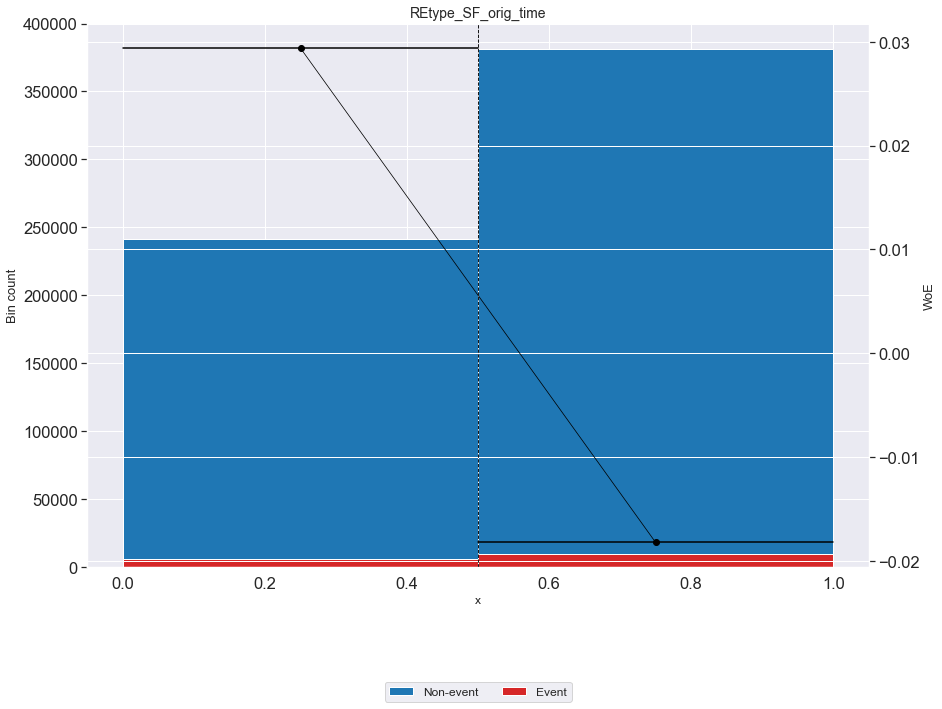

array([-inf,  0.5,  inf])

In [48]:
# Visulization of the calculated optimal bins and corresponding weight of evidence.
optb.binning_table.plot(metric="woe", style="actual", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [49]:
Data  = kategorizer(Data, 'REtype_SF_orig_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,H,0,B,0,715,69.40000,9.20000,0,0
1,1,26,A,A,F,0,B,0,715,69.40000,9.20000,0,0
2,1,27,A,A,G,0,B,0,715,69.40000,9.20000,0,0
3,1,28,A,A,E,0,B,0,715,69.40000,9.20000,0,0
4,1,29,A,A,E,0,B,0,715,69.40000,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,E,1,A,0,653,80.00000,1.75000,0,0
622485,50000,57,A,B,G,1,A,0,653,80.00000,1.75000,0,0
622486,50000,58,A,B,H,1,A,0,653,80.00000,1.75000,0,0
622487,50000,59,A,B,G,1,A,0,653,80.00000,1.75000,0,0


Text(0, 0.5, 'S(t)')

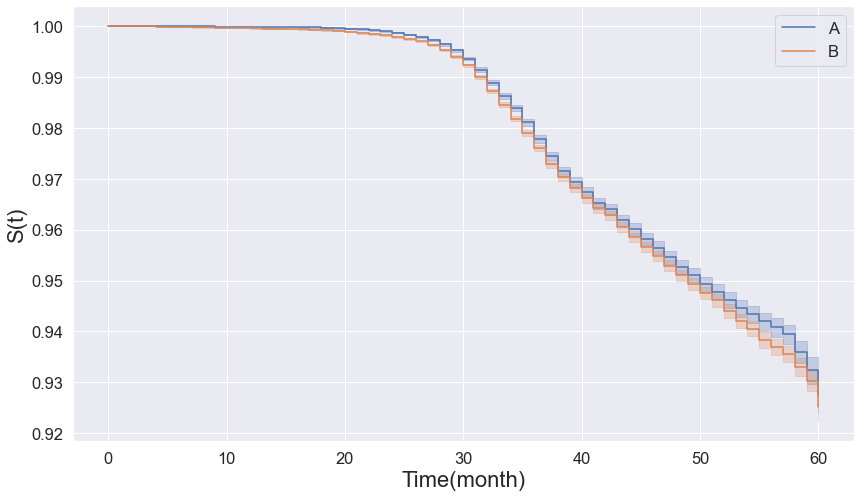

In [50]:
# Calculating the survival function for each subcategories to see if they look distinctive
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['REtype_SF_orig_time'].sort_values().unique().tolist():
    data = Data[Data['REtype_SF_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [51]:
# Atleast by naked eyes we can not decide if they look distinctive or not.
# Hence, using the Logrank test provides quantitative more precise measure (p-value).
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('REtype_SF_orig_time').sort_values('p', ascending = True)

,,test_statistic,p,-log2(p)
A,B,14.50062,0.00014,12.80112


## investor_orig_time

In [52]:
# Calculation of the optimal bins and corresponding weight of evidence and information values
optb = OptimalBinning(name = 'investor_orig_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['investor_orig_time'], Data['status_time'])

OptimalBinning(name='investor_orig_time')

In [53]:
# Printing the calculated table
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",536445,0.86177,523249,13196,0.02460,-0.01040,0.00009,0.00001
1,"[0.50, inf)",86044,0.13823,84082,1962,0.02280,0.06728,0.00061,0.00008
2,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
3,Missing,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
Totals,,622489,1.00000,607331,15158,0.02435,,0.00070,0.00009


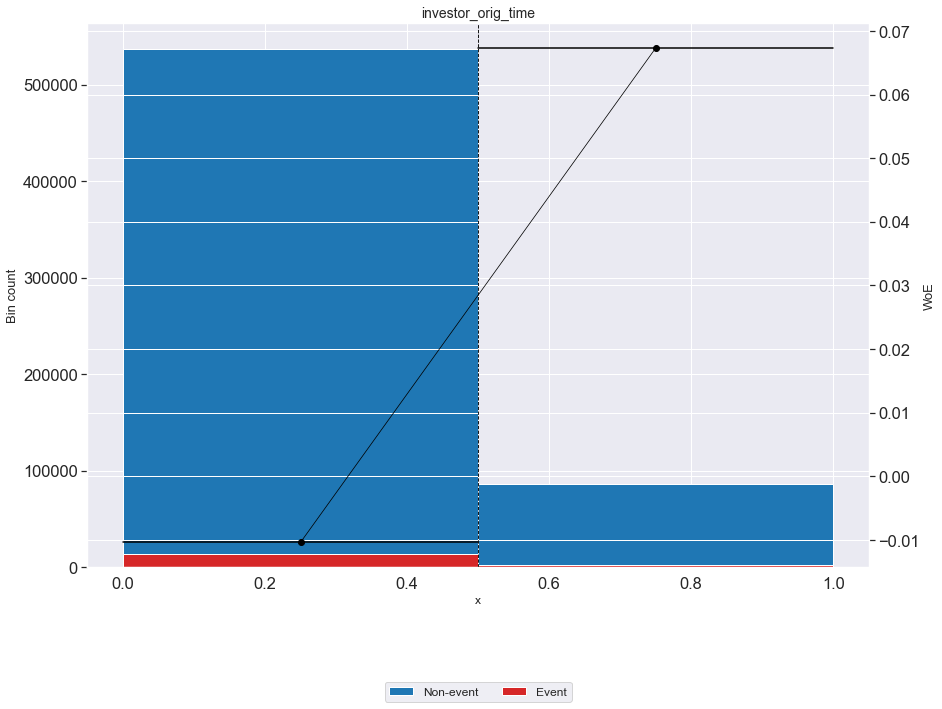

array([-inf,  0.5,  inf])

In [54]:
# Visualizing the obtained results
optb.binning_table.plot(metric="woe", style="actual", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [55]:
Data  = kategorizer(Data, 'investor_orig_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,H,0,B,A,715,69.40000,9.20000,0,0
1,1,26,A,A,F,0,B,A,715,69.40000,9.20000,0,0
2,1,27,A,A,G,0,B,A,715,69.40000,9.20000,0,0
3,1,28,A,A,E,0,B,A,715,69.40000,9.20000,0,0
4,1,29,A,A,E,0,B,A,715,69.40000,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,E,1,A,A,653,80.00000,1.75000,0,0
622485,50000,57,A,B,G,1,A,A,653,80.00000,1.75000,0,0
622486,50000,58,A,B,H,1,A,A,653,80.00000,1.75000,0,0
622487,50000,59,A,B,G,1,A,A,653,80.00000,1.75000,0,0


Text(0, 0.5, 'S(t)')

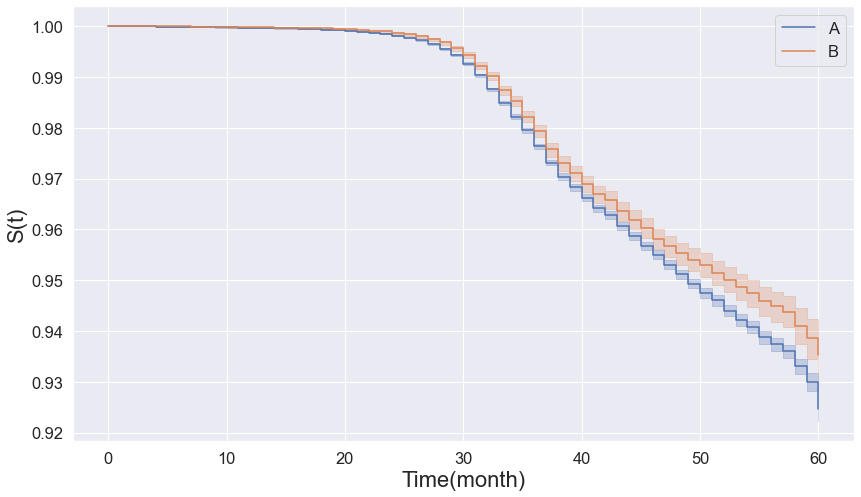

In [56]:
# Visualizing the survival functions corresponding to those survived features
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['investor_orig_time'].sort_values().unique().tolist():
    data = Data[Data['investor_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [57]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('investor_orig_time').sort_values('p', ascending = True)

,,test_statistic,p,-log2(p)
A,B,26.53633,0.00000,21.88262


## FICO_orig_time

In [58]:
optb = OptimalBinning(name = 'FICO_orig_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['FICO_orig_time'], Data['status_time'])

OptimalBinning(name='FICO_orig_time')

In [59]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 581.50)",70951,0.11398,68419,2532,0.03569,-0.39390,0.02142,0.00266
1,"[581.50, 611.50)",50393,0.08095,48658,1735,0.03443,-0.35674,0.01225,0.00152
2,"[611.50, 650.50)",103320,0.16598,100055,3265,0.03160,-0.26809,0.01358,0.00169
3,"[650.50, 666.50)",52055,0.08362,50591,1464,0.02812,-0.14794,0.00197,0.00025
4,"[666.50, 676.50)",31740,0.05099,30896,844,0.02659,-0.09032,0.00043,0.00005
5,"[676.50, 686.50)",32892,0.05284,32035,857,0.02605,-0.06940,0.00026,0.00003
6,"[686.50, 702.50)",51012,0.08195,49891,1121,0.02198,0.10507,0.00086,0.00011
7,"[702.50, 715.50)",39458,0.06339,38645,813,0.02060,0.17090,0.00171,0.00021
8,"[715.50, 730.50)",39997,0.06425,39265,732,0.01830,0.29176,0.00477,0.00059
9,"[730.50, 751.50)",52052,0.08362,51223,829,0.01593,0.43318,0.01284,0.00159


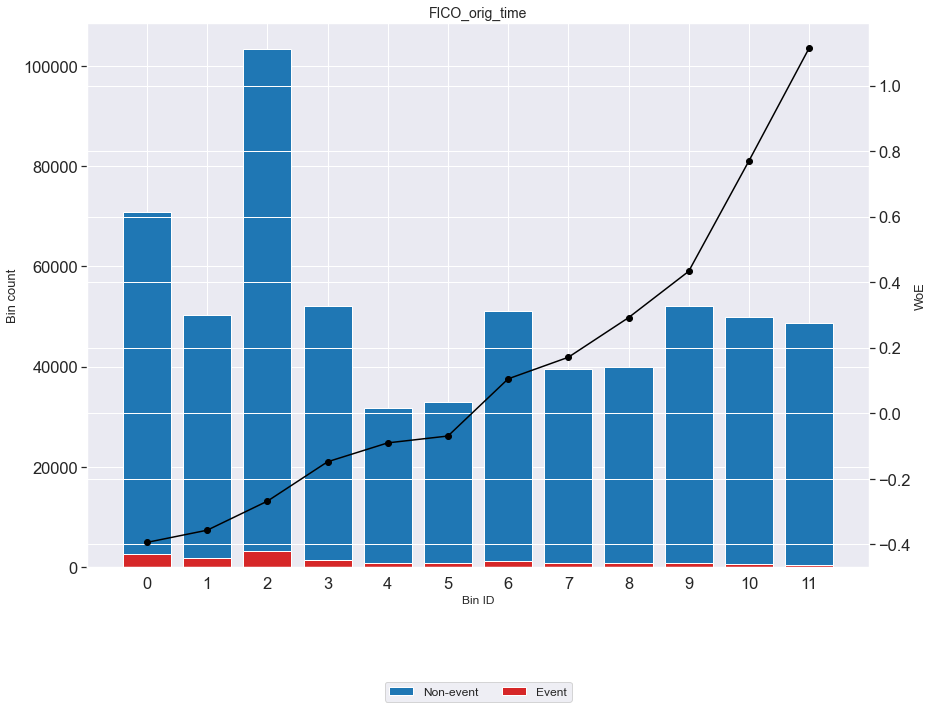

array([ -inf, 581.5, 611.5, 650.5, 666.5, 676.5, 686.5, 702.5, 715.5,
       730.5, 751.5, 773.5,   inf])

In [60]:
optb.binning_table.plot(metric="woe", style="bin", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [61]:
Data  = kategorizer(Data, 'FICO_orig_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,H,0,B,A,H,69.40000,9.20000,0,0
1,1,26,A,A,F,0,B,A,H,69.40000,9.20000,0,0
2,1,27,A,A,G,0,B,A,H,69.40000,9.20000,0,0
3,1,28,A,A,E,0,B,A,H,69.40000,9.20000,0,0
4,1,29,A,A,E,0,B,A,H,69.40000,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,E,1,A,A,D,80.00000,1.75000,0,0
622485,50000,57,A,B,G,1,A,A,D,80.00000,1.75000,0,0
622486,50000,58,A,B,H,1,A,A,D,80.00000,1.75000,0,0
622487,50000,59,A,B,G,1,A,A,D,80.00000,1.75000,0,0


Text(0, 0.5, 'S(t)')

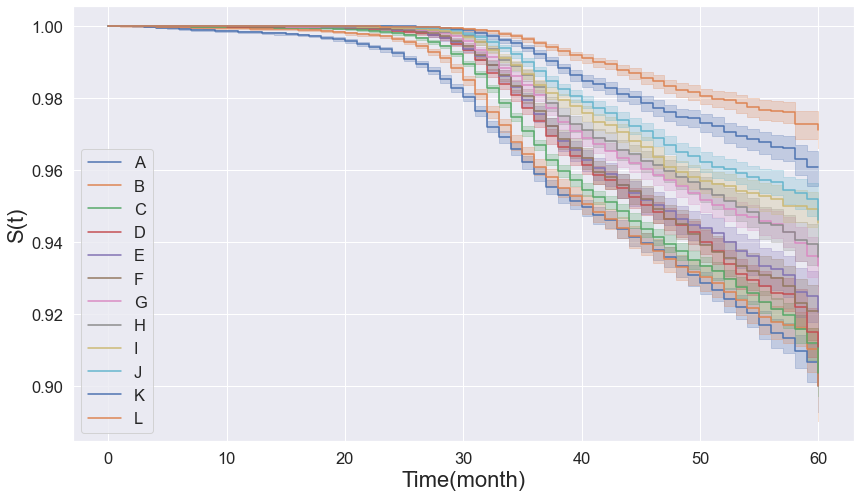

In [62]:
# Visualizing the survival functions for those survived subcategories
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['FICO_orig_time'].sort_values().unique().tolist():
    data = Data[Data['FICO_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [63]:
# Since the distinctivity of the calculated survival functions are not recognizable with naked eyes,
# then using a Logrank test sounds essential and here we go!
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('FICO_orig_time').sort_values('p', ascending = True)

,,test_statistic,p,-log2(p)
A,L,1168.85649,0.00000,848.57415
B,L,996.01595,0.00000,723.78084
C,L,921.11501,0.00000,669.69496
A,K,857.39336,0.00000,623.67791
B,K,694.86051,0.00000,506.28401
D,L,640.19671,0.00000,466.79349
C,K,632.73158,0.00000,461.40010
A,J,589.51594,0.00000,430.17574
F,L,508.41627,0.00000,371.56832
E,L,486.53655,0.00000,355.75383


In [64]:
# Merging those categories which their survival functions are not distinctive
Data['FICO_orig_time']= Data['FICO_orig_time'].replace({'E':'D', 'G':'H', 'F':'D'})

Text(0, 0.5, 'S(t)')

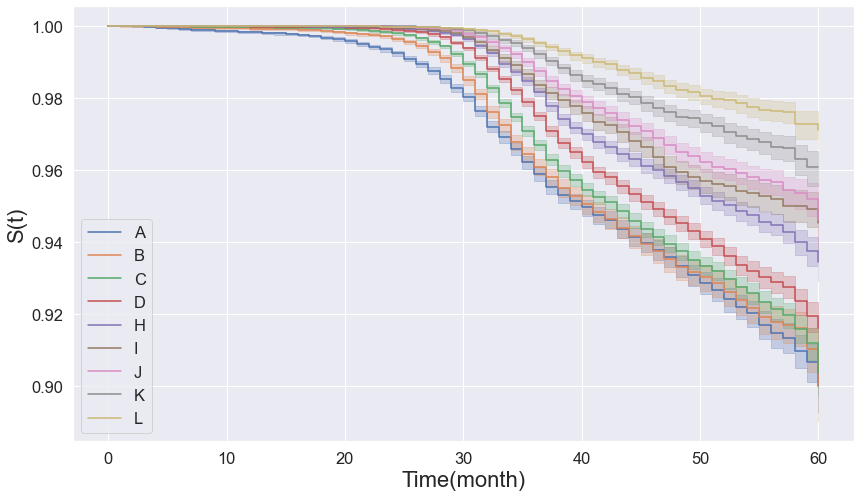

In [65]:
# Visualizing the calculated survival function of survived subcategories.
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['FICO_orig_time'].sort_values().unique().tolist():
    data = Data[Data['FICO_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [66]:
# Since the distinctivity of the calculated survival functions are not recognizable with naked eyes,
# then using a Logrank test sounds essential and here we go!
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('FICO_orig_time').sort_values('p', ascending = True)

test_statistic       p  -log2(p)
A L      1168.85649 0.00000 848.57415
B L       996.01595 0.00000 723.78084
C L       921.11501 0.00000 669.69496
A K       857.39336 0.00000 623.67791
B K       694.86051 0.00000 506.28401
D L       680.71846 0.00000 496.06789
C K       632.73158 0.00000 461.40010
A J       589.51594 0.00000 430.17574
  H       465.11583 0.00000 340.26971
B J       447.00067 0.00000 327.17385
D K       424.82755 0.00000 311.14279
C J       391.81245 0.00000 287.26935
H L       381.32203 0.00000 279.68264
A I       374.15466 0.00000 274.49886
B H       301.67389 0.00000 222.06062
  I       277.07745 0.00000 204.25711
C H       252.10995 0.00000 186.17926
  I       224.24716 0.00000 165.99672
D J       219.46968 0.00000 162.53510
I L       212.13281 0.00000 157.21836
A D       200.12851 0.00000 148.51746
H K       185.68847 0.00000 138.04771
J L       149.10140 0.00000 111.49927
D I       106.62431 0.00000  80.62036
B D       100.61164 0.00000  76.24203
D H        87.34672 0.00000  66.57349
I K        77.74205 0.00000  59.56309
A C        54.81356 0.00000  42.77882
C D        54.35041 0.00000  42.43882
H J        53.29393 0.00000  41.66305
J K        38.69931 0.00000  30.91365
K L        36.52918 0.00000  29.30857
B C        15.36215 0.00009  13.45992
H I        12.25883 0.00046  11.07651
I J         8.86532 0.00291   8.42656
A B         6.97212 0.00828   6.91634

## LTV_orig_time

In [67]:
# Calculating the optimal bins and coorresponding weight of evidence
optb = OptimalBinning(name = 'LTV_orig_time', dtype = "numerical", solver = "cp",)
optb.fit(Data['LTV_orig_time'], Data['status_time'])

OptimalBinning(name='LTV_orig_time')

In [68]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 59.75)",31822,0.05112,31576,246,0.00773,1.16428,0.04164,0.00493
1,"[59.75, 69.95)",64042,0.10288,63159,883,0.01379,0.57954,0.02651,0.00327
2,"[69.95, 74.55)",48947,0.07863,48006,941,0.01922,0.24159,0.00410,0.00051
3,"[74.55, 79.95)",81113,0.13030,79440,1673,0.02063,0.16984,0.00347,0.00043
4,"[79.95, inf)",396565,0.63706,385150,11415,0.02878,-0.17184,0.02043,0.00255
5,Special,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
6,Missing,0,0.00000,0,0,0.00000,0.00000,0.00000,0.00000
Totals,,622489,1.00000,607331,15158,0.02435,,0.09615,0.01169


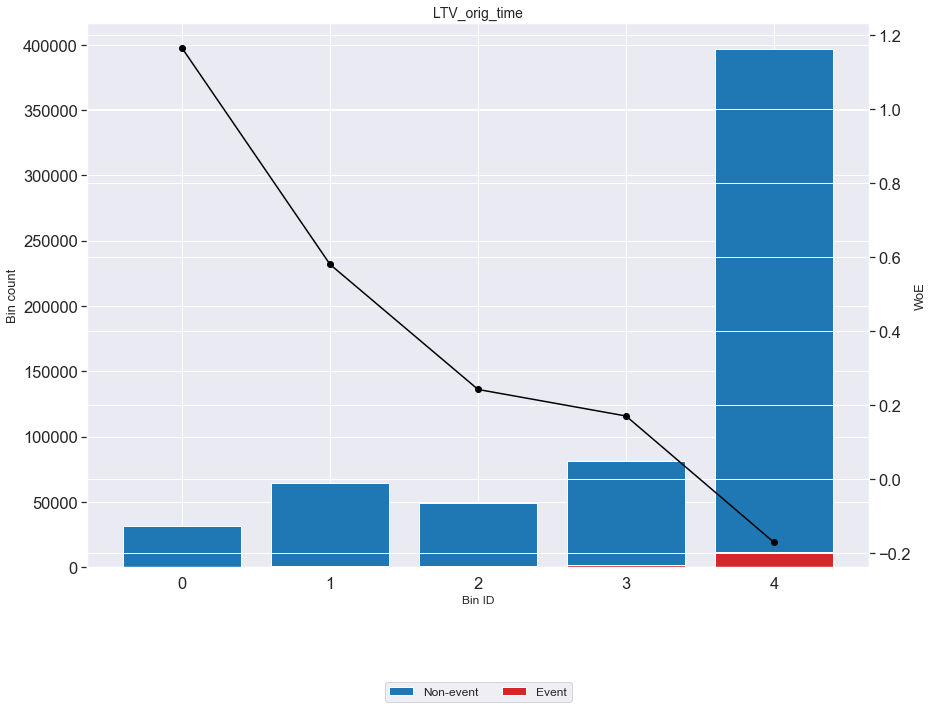

array([       -inf, 59.75      , 69.95000076, 74.54999924, 79.95000076,
               inf])

In [69]:
optb.binning_table.plot(metric="woe", style="bin", add_special=False, add_missing=False)
bins = np.append(-np.inf, np.append(optb.splits, +np.inf))
bins

In [70]:
Data  = kategorizer(Data, 'LTV_orig_time', bins)
Data

,id,time,orig_time,balance_time,gdp_time,REtype_CO_orig_time,REtype_SF_orig_time,investor_orig_time,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,default_time,status_time
0,1,25,A,A,H,0,B,A,H,B,9.20000,0,0
1,1,26,A,A,F,0,B,A,H,B,9.20000,0,0
2,1,27,A,A,G,0,B,A,H,B,9.20000,0,0
3,1,28,A,A,E,0,B,A,H,B,9.20000,0,0
4,1,29,A,A,E,0,B,A,H,B,9.20000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622484,50000,56,A,B,E,1,A,A,D,E,1.75000,0,0
622485,50000,57,A,B,G,1,A,A,D,E,1.75000,0,0
622486,50000,58,A,B,H,1,A,A,D,E,1.75000,0,0
622487,50000,59,A,B,G,1,A,A,D,E,1.75000,0,0


Text(0, 0.5, 'S(t)')

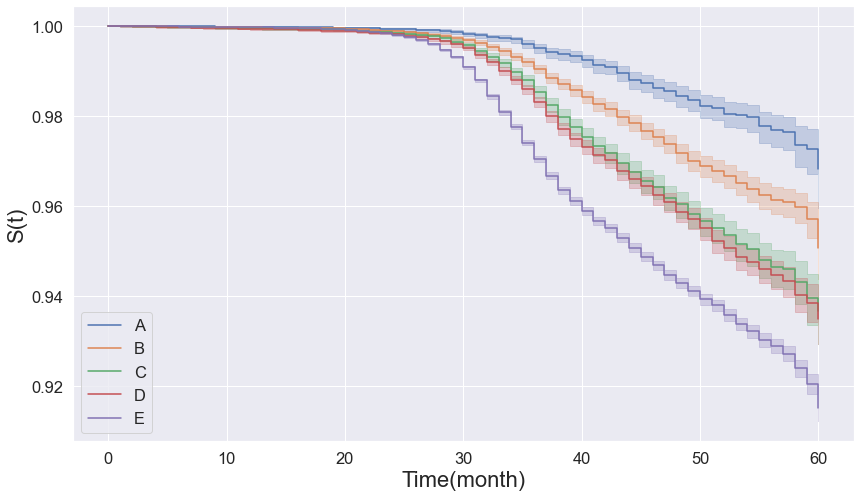

In [71]:
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['LTV_orig_time'].sort_values().unique().tolist():
    data = Data[Data['LTV_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('LTV_orig_time').sort_values('p', ascending = True)

test_statistic       p  -log2(p)
B E       561.18853 0.00000 409.70643
A E       547.19676 0.00000 399.59536
  D       246.26866 0.00000 181.94888
D E       205.49889 0.00000 152.41029
A C       192.44949 0.00000 142.95028
C E       174.80460 0.00000 130.15355
B D       111.90332 0.00000  84.46260
A B        69.21844 0.00000  53.33298
B C        61.67641 0.00000  47.81171
C D         3.08476 0.07903   3.66147

In [73]:
Data['LTV_orig_time']= Data['LTV_orig_time'].replace({'D':'C',})

Text(0, 0.5, 'S(t)')

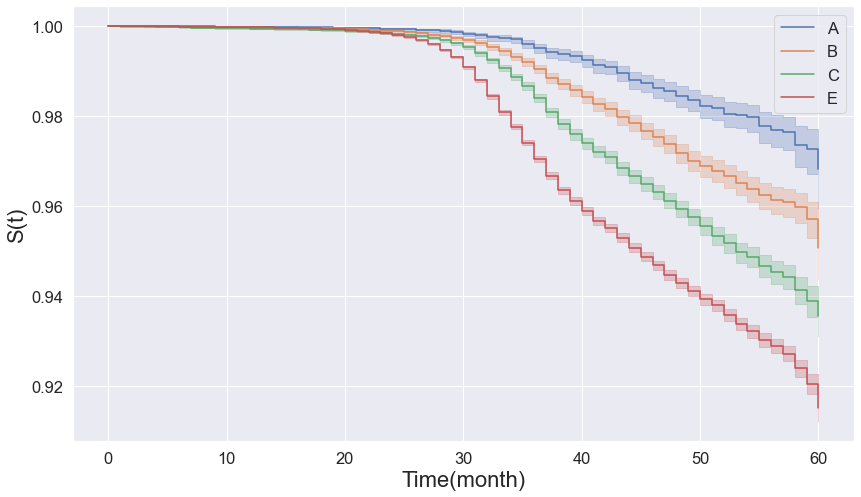

In [74]:
fig = plt.figure(figsize=(14, 8))
ax  = plt.subplot()
kmf = KaplanMeierFitter()

for item in Data['LTV_orig_time'].sort_values().unique().tolist():
    data = Data[Data['LTV_orig_time'] == item]
    kmf_Data = KaplanMeierFitter().fit(data['time'], data['status_time'], label = item)
    ax = kmf_Data.plot(ax = ax, ci_show = True)
ax.set_xlabel("Time(month)", fontsize = 22)
ax.set_ylabel("S(t)", fontsize = 22)  

In [75]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print_logrank('LTV_orig_time').sort_values('p', ascending = True)

,,test_statistic,p,-log2(p)
B,E,561.18853,0.00000,409.70643
A,E,547.19676,0.00000,399.59536
C,E,344.25878,0.00000,252.87380
A,C,244.23368,0.00000,180.47501
B,C,112.71689,0.00000,85.05460
A,B,69.21844,0.00000,53.33298


In [76]:
Data.drop('default_time', axis = 1, inplace = True)

<p style='text-align: justify;'> We are effectively done with the single factor analysis stage and we are about to enter the stage of multi factor analysis. However, we will only take those features which we will include in the multifactor analysis (their categorized version to create dummy variables). Below cell does this job. </p>

In [77]:
features_list = ['FICO_orig_time', 'Interest_Rate_orig_time', 'LTV_orig_time',
                 'REtype_CO_orig_time', 'REtype_SF_orig_time', 'balance_time',
                 'gdp_time', 'investor_orig_time',
                 'orig_time',]

df_cox = Data[['time', 'status_time', ]]

for col in features_list:
    dummies = pd.get_dummies(Data[[col]], drop_first = True)
    df_cox  = pd.concat([df_cox, dummies], axis = 1)

df_cox.head()

,time,status_time,FICO_orig_time_B,FICO_orig_time_C,FICO_orig_time_D,FICO_orig_time_H,FICO_orig_time_I,FICO_orig_time_J,FICO_orig_time_K,FICO_orig_time_L,...,gdp_time_C,gdp_time_D,gdp_time_E,gdp_time_F,gdp_time_G,gdp_time_H,gdp_time_I,investor_orig_time_B,orig_time_C,orig_time_E
0,25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,26,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,28,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,29,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


<p style='text-align: justify;'> As I briefly mentioned in the begining, existing colinearity between the survived features may resulted in a serious convergence problems (sometimes it will not bea practically easy to fix it) during the fitting cox-ph model. In order to prevent such issue, it worth to check the colinearity betweeen survived categories. The below heatmap shows the corrolation between each survived subcategories. As the obtianed results show, we are lucky and there is no serios colinearity between survived subcategories which is good news (there is no need more effort for removing the colinearity).</p>

<AxesSubplot:>

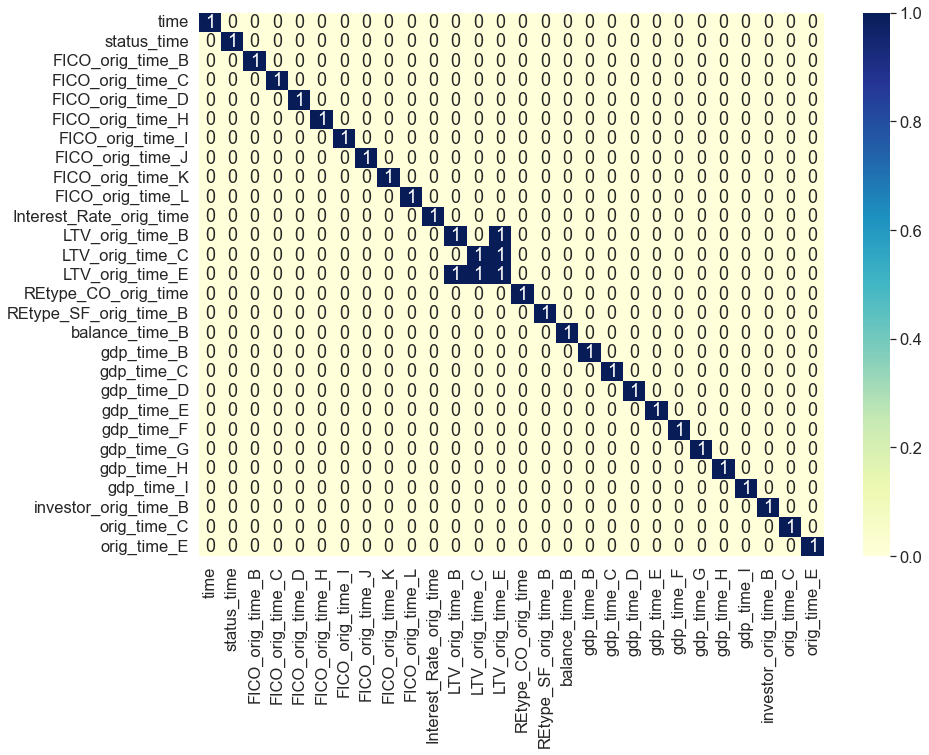

In [78]:
sns.heatmap(df_cox.corr().abs() > 0.4 ,cmap="YlGnBu", annot=True,)

## Third step : Multifactor analysis 

<p style='text-align: justify;'> After the singlefactor analysis, the multifactor analysis is started. The multifactor analysis determines how the individual risk drivers, identified in the SFA, is incorporated into the final model. The goal of the MFA is to come up with a final model based on the best combined explanatory factors, taking into account redundancy/dependence between the factors. Herel et al., [2012] the multifactor analysis consists of the following steps: </p>

### Backward feature selection : Manual

<p style='text-align: justify;'> Once all the feature preparation is done, we are ready to aaply the final model to calculate the coefficents corresponding to each categories. As we implicitely mentioned earlier, in a realist cases from practical point of view we have to keep the balance between the performance and interprebility of the model. To this end, we have to take the best set of features to the final model. Here, I will consider the whole set of features into the model and then based on the obtained p-value we drop those features with the p-values grater than critical value (0.05). The features with the p-values less than 0.05 will be taken into the final model. What I have discussed here, is the manul implementation of the backward feature selection and will be implemented in below cells.</p>

In [79]:
# Take all the survived features into the model to select those with the p-values less than 0.05 to take
# them into the final model.
cph = CoxPHFitter(penalizer = 0.001, alpha = 0.001,).fit(df_cox, 'time', 'status_time', show_progress = True)

Iteration 1: norm_delta = 1.81984, step_size = 0.9000, log_lik = -189346.45394, newton_decrement = 6694.94554, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.56638, step_size = 0.9000, log_lik = -183925.53868, newton_decrement = 681.59936, seconds_since_start = 0.2
Iteration 3: norm_delta = 0.04674, step_size = 0.9000, log_lik = -183276.90573, newton_decrement = 7.46204, seconds_since_start = 0.4
Iteration 4: norm_delta = 0.00105, step_size = 1.0000, log_lik = -183269.35380, newton_decrement = 0.00405, seconds_since_start = 0.5
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -183269.34975, newton_decrement = 0.00000, seconds_since_start = 0.6
Convergence success after 5 iterations.


In [80]:
# Select those features with p-value less than 0.05 
pd.set_option('display.max_rows', 500)
valid_coef = cph.summary.loc[cph.summary['p'] < 0.05]
sorted_sum = valid_coef.iloc[valid_coef['coef'].abs().argsort()].round(4)
sorted_sum

,coef,exp(coef),se(coef),coef lower 99.9%,coef upper 99.9%,exp(coef) lower 99.9%,exp(coef) upper 99.9%,z,p,-log2(p)
covariate,,,,,,,,,,
balance_time_B,0.06130,1.06320,0.02840,-0.03220,0.15480,0.96830,1.16740,2.15690,0.03100,5.01090
gdp_time_B,0.13980,1.15000,0.03010,0.04080,0.23890,1.04160,1.26980,4.64450,0.00000,18.16240
investor_orig_time_B,0.15980,1.17320,0.02460,0.07870,0.24090,1.08190,1.27240,6.48340,0.00000,33.37680
FICO_orig_time_C,-0.19070,0.82640,0.02560,-0.27500,-0.10650,0.75960,0.89900,-7.44740,0.00000,43.25600
FICO_orig_time_D,-0.35070,0.70420,0.02590,-0.43590,-0.26550,0.64670,0.76680,-13.54580,0.00000,136.45240
orig_time_C,0.36440,1.43970,0.02890,0.26950,0.45940,1.30920,1.58310,12.62740,0.00000,119.01370
LTV_orig_time_C,0.40360,1.49710,0.04130,0.26760,0.53960,1.30680,1.71520,9.76410,0.00000,72.40000
orig_time_E,0.52680,1.69340,0.02020,0.46020,0.59330,1.58430,1.81000,26.02750,0.00000,493.69370
FICO_orig_time_H,-0.57700,0.56160,0.02940,-0.67370,-0.48030,0.50980,0.61860,-19.63130,0.00000,282.62370


## Final step : cox-ph model with selected features
<p style='text-align: justify;'> After a long journy, we are now in the position to apply the  final model (cox-ph) to the selected features. The list of those features which have to be included in the final model are listed in below. </p>

In [81]:
# List of final selected features to be incorporated into final model
features_list = ['FICO_orig_time', 'LTV_orig_time', 'balance_time',
                 'gdp_time', 'investor_orig_time',    'orig_time',]

df_cox = Data[['time', 'status_time', ]]

for col in features_list:
    dummies = pd.get_dummies(Data[[col]], drop_first = True)
    df_cox  = pd.concat([df_cox, dummies], axis = 1)

df_cox.head()

,time,status_time,FICO_orig_time_B,FICO_orig_time_C,FICO_orig_time_D,FICO_orig_time_H,FICO_orig_time_I,FICO_orig_time_J,FICO_orig_time_K,FICO_orig_time_L,...,gdp_time_C,gdp_time_D,gdp_time_E,gdp_time_F,gdp_time_G,gdp_time_H,gdp_time_I,investor_orig_time_B,orig_time_C,orig_time_E
0,25,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,26,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,28,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,29,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
cph = CoxPHFitter(penalizer = 0.001, alpha = 0.001,).fit(df_cox, 'time', 'status_time', show_progress = True)

Iteration 1: norm_delta = 1.81917, step_size = 0.9000, log_lik = -189346.45394, newton_decrement = 6693.22821, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.56650, step_size = 0.9000, log_lik = -183927.71322, newton_decrement = 681.16317, seconds_since_start = 0.3
Iteration 3: norm_delta = 0.04663, step_size = 0.9000, log_lik = -183279.51373, newton_decrement = 7.44792, seconds_since_start = 2.4
Iteration 4: norm_delta = 0.00105, step_size = 1.0000, log_lik = -183271.97602, newton_decrement = 0.00404, seconds_since_start = 2.5
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, log_lik = -183271.97197, newton_decrement = 0.00000, seconds_since_start = 2.6
Convergence success after 5 iterations.


In [83]:
pd.set_option('display.max_rows', 500)
valid_coef = cph.summary.loc[cph.summary['p'] < 1.0]
sorted_sum = valid_coef.iloc[valid_coef['coef'].abs().argsort()].round(4)
sorted_sum

,coef,exp(coef),se(coef),coef lower 99.9%,coef upper 99.9%,exp(coef) lower 99.9%,exp(coef) upper 99.9%,z,p,-log2(p)
covariate,,,,,,,,,,
gdp_time_C,0.04220,1.04310,0.03410,-0.07000,0.15440,0.93240,1.16700,1.23760,0.21590,2.21180
FICO_orig_time_B,-0.04980,0.95140,0.03020,-0.14930,0.04970,0.86130,1.05100,-1.64600,0.09980,3.32540
balance_time_B,0.05900,1.06070,0.02830,-0.03430,0.15230,0.96630,1.16450,2.08000,0.03750,4.73610
LTV_orig_time_B,0.06560,1.06780,0.04840,-0.09360,0.22470,0.91070,1.25200,1.35600,0.17510,2.51380
gdp_time_B,0.13990,1.15010,0.03010,0.04080,0.23890,1.04170,1.26990,4.64640,0.00000,18.17560
investor_orig_time_B,0.16210,1.17600,0.02450,0.08150,0.24270,1.08490,1.27460,6.61950,0.00000,34.69190
FICO_orig_time_C,-0.18960,0.82730,0.02560,-0.27370,-0.10550,0.76060,0.89990,-7.41660,0.00000,42.92020
FICO_orig_time_D,-0.34730,0.70660,0.02570,-0.43200,-0.26260,0.64920,0.76900,-13.49110,0.00000,135.37920
orig_time_C,0.36550,1.44120,0.02890,0.27050,0.46040,1.31070,1.58470,12.66660,0.00000,119.73260


<AxesSubplot:xlabel='log(HR) (99.9% CI)'>

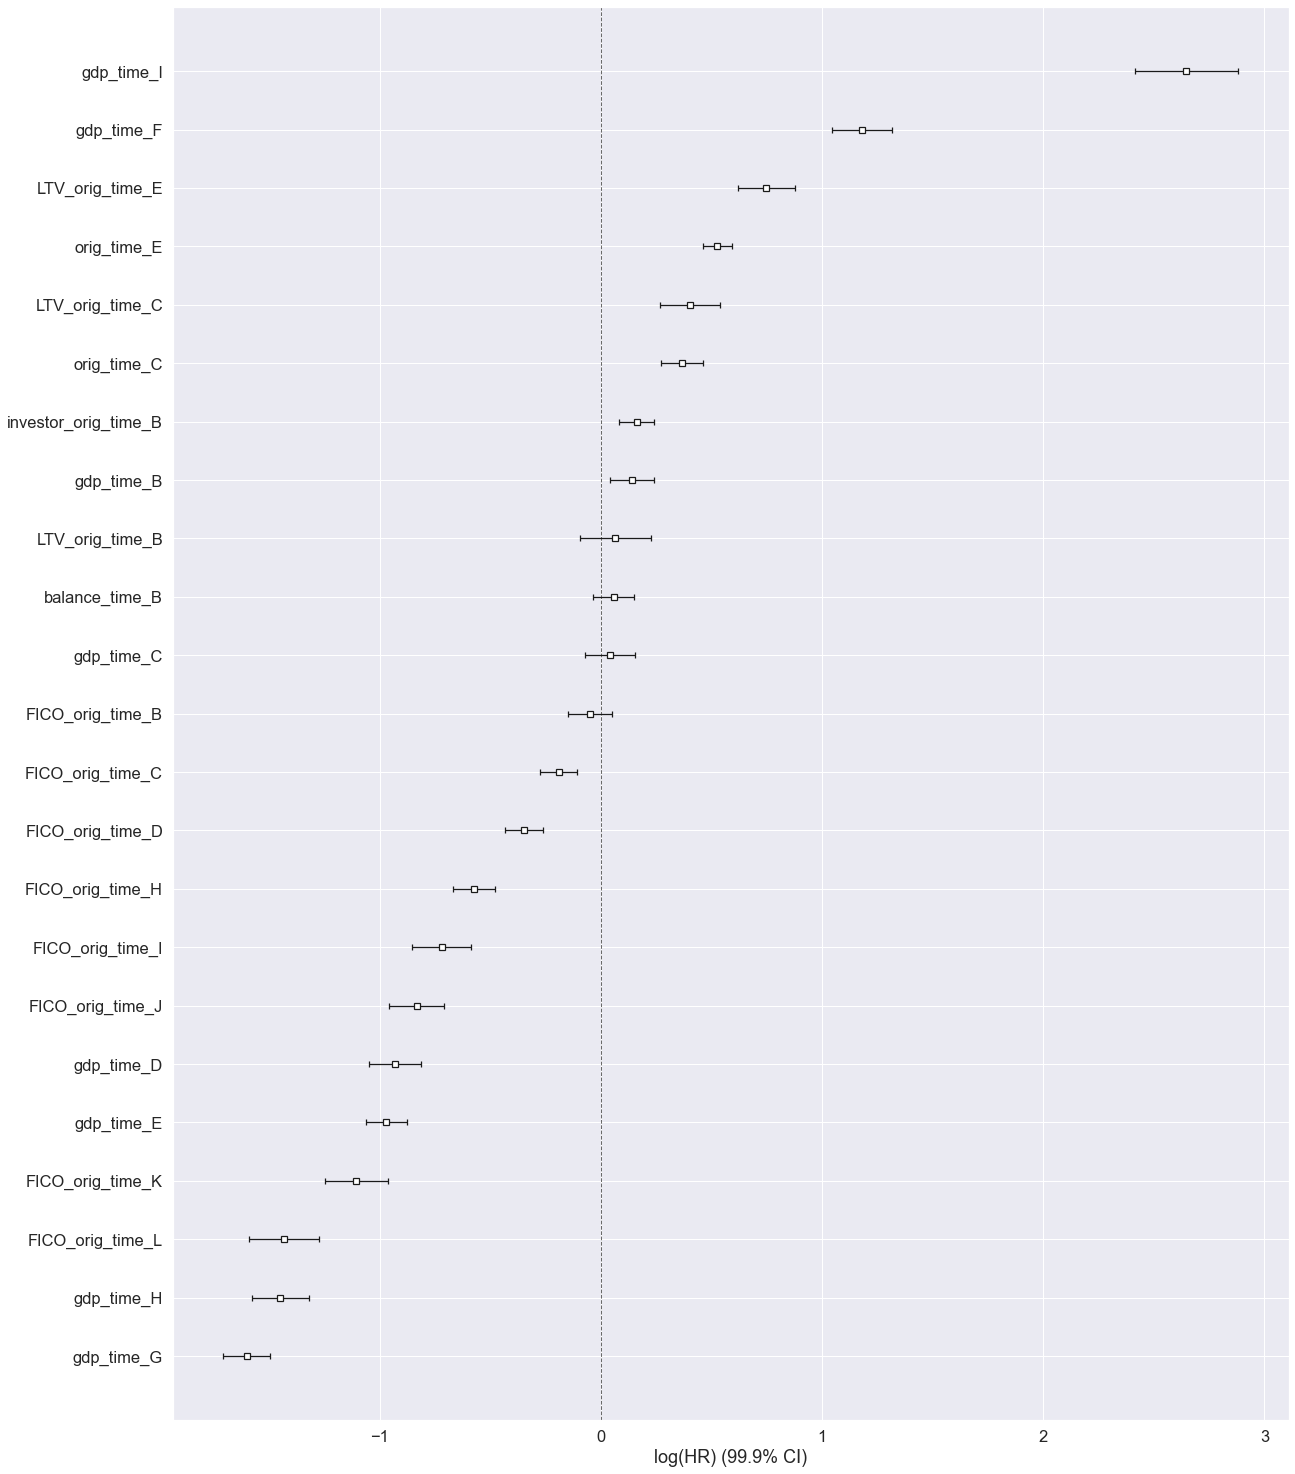

In [84]:
plt.figure(figsize=(20, 26))
cph.plot()

In [85]:
preds = cph.predict_survival_function(df_cox).reset_index(drop = True)
preds.head()

,0,1,2,3,4,5,6,7,8,9,...,622479,622480,622481,622482,622483,622484,622485,622486,622487,622488
0,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
1,1.00000,0.99999,1.00000,1.00000,1.00000,0.99999,1.00000,1.00000,1.00000,1.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
2,1.00000,0.99997,1.00000,1.00000,1.00000,0.99997,1.00000,1.00000,0.99999,0.99999,...,1.00000,0.99999,0.99999,0.99999,1.00000,0.99999,1.00000,0.99999,1.00000,1.00000
3,1.00000,0.99994,1.00000,0.99999,0.99999,0.99994,0.99999,0.99999,0.99998,0.99998,...,1.00000,0.99998,0.99998,0.99998,0.99999,0.99998,0.99999,0.99999,0.99999,0.99999
4,0.99999,0.99992,0.99999,0.99999,0.99999,0.99992,0.99999,0.99999,0.99997,0.99997,...,1.00000,0.99997,0.99997,0.99997,0.99999,0.99997,0.99999,0.99998,0.99999,0.99999


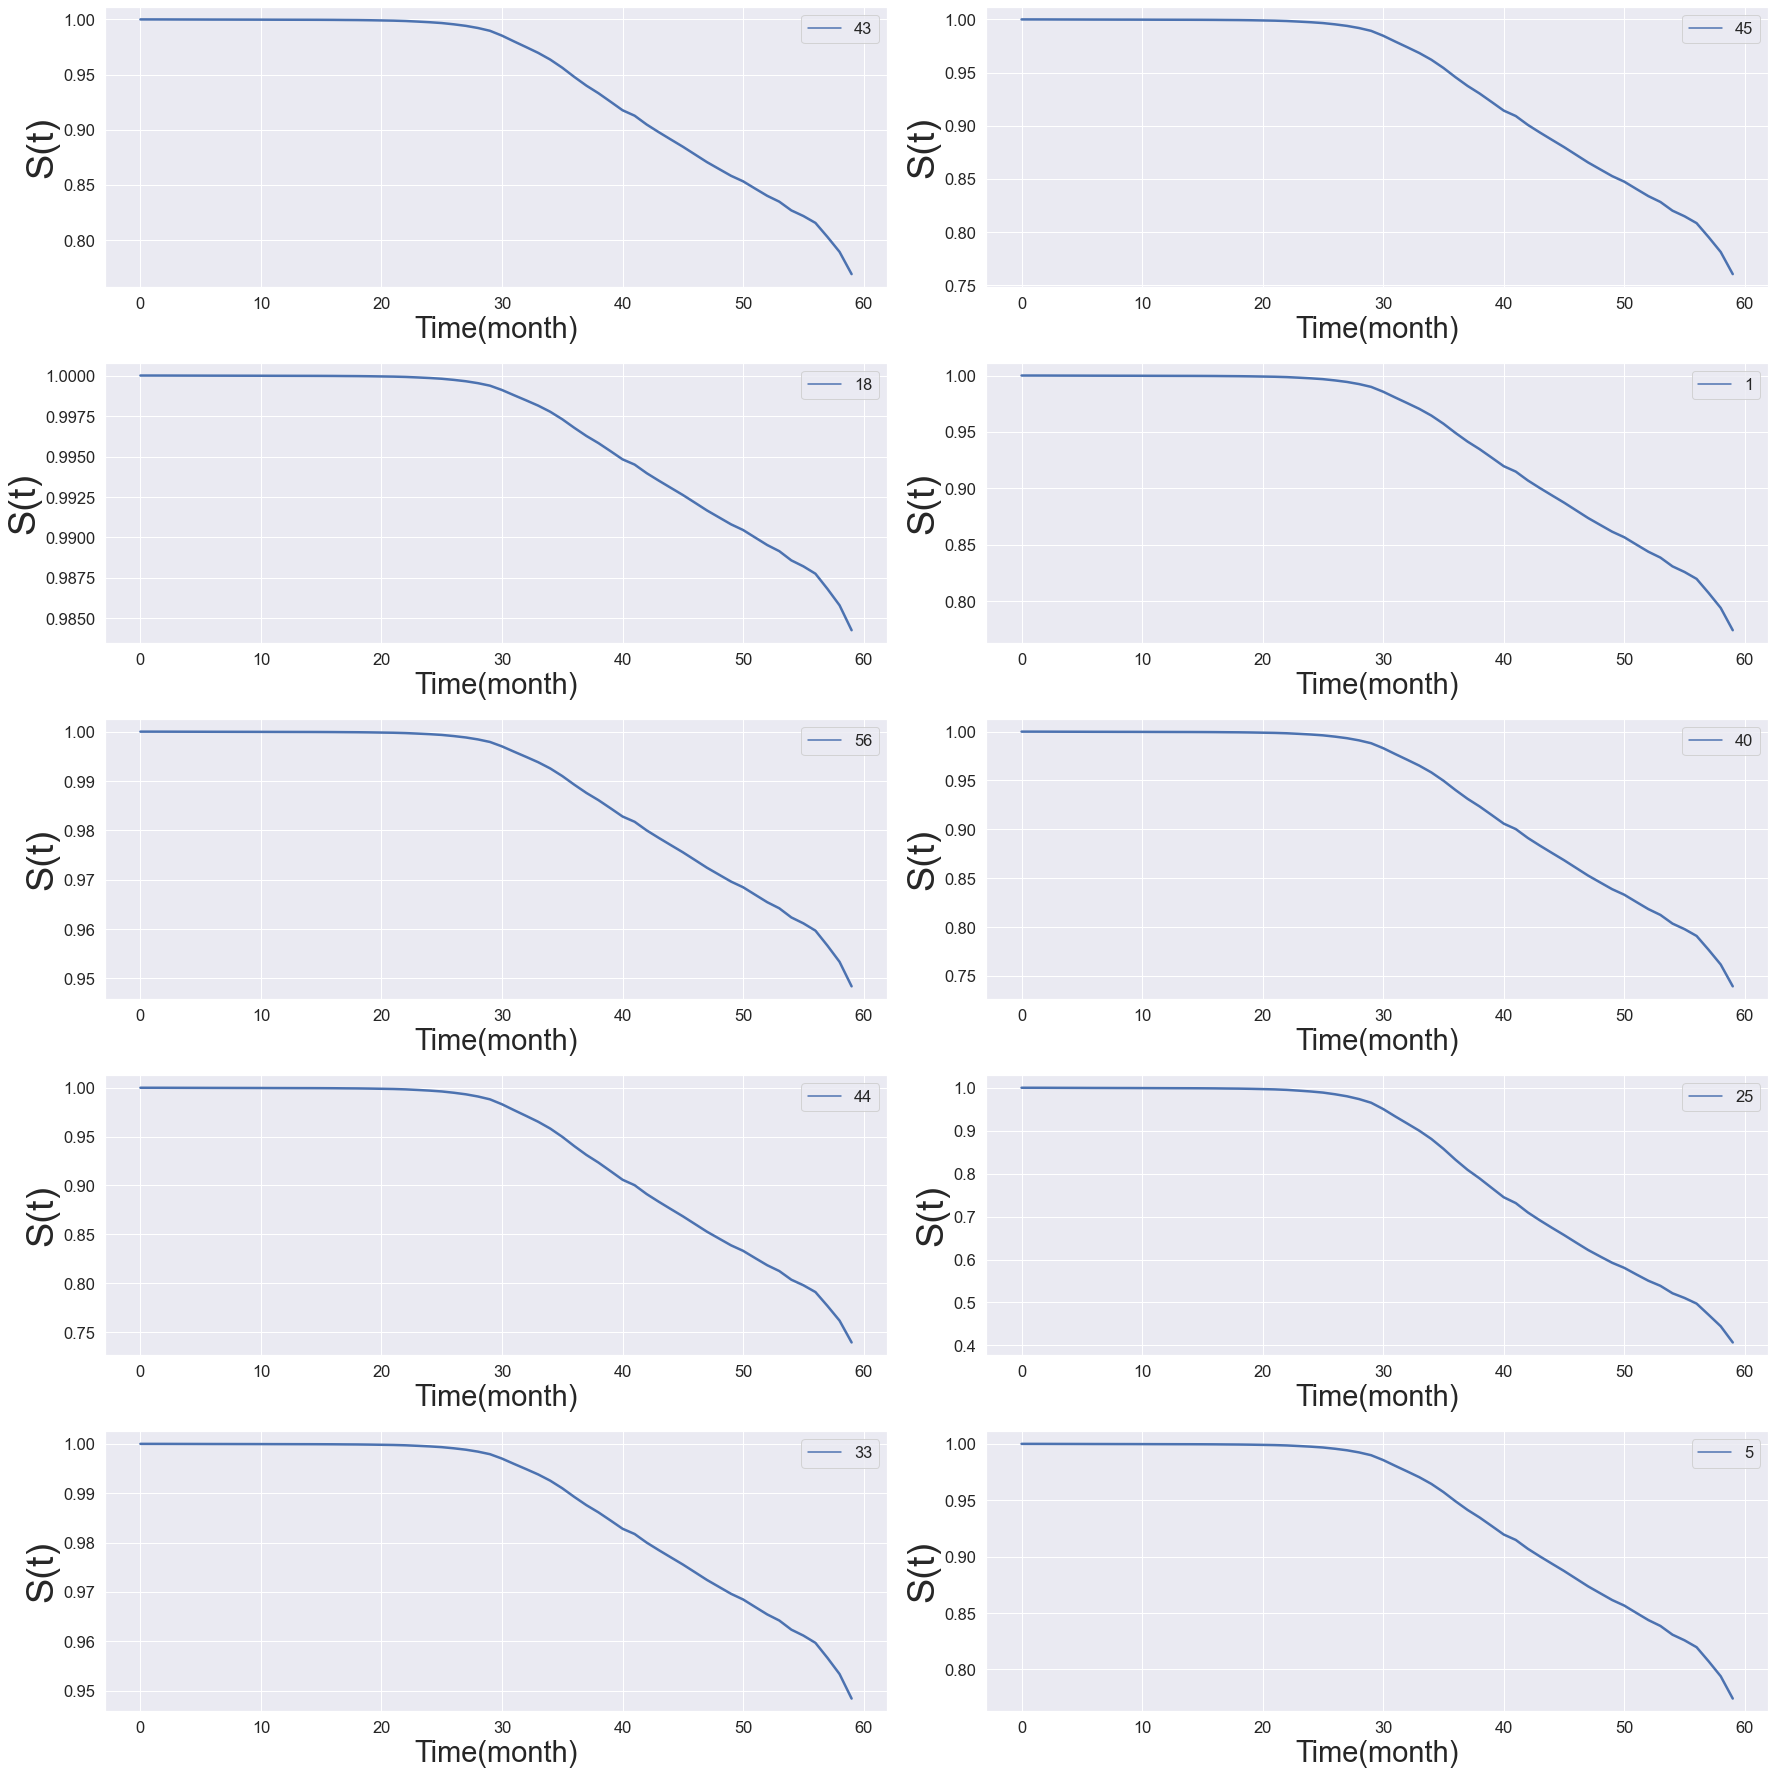

In [86]:
import random as rnd
fig , axes = plt.subplots(nrows = 5, ncols = 2, figsize = ((25,25)))

count = 1
for i in range(5*2):
      plt.subplot(5,2, count);
      rndm_customer = rnd.sample(range(1, preds.shape[0]), 1)
      un_con = sns.lineplot(data = preds.iloc[:, rndm_customer], color='blue', linewidth = 2.5);
      #wn_cun = sns.lineplot(data = conditioned_prediction.iloc[:, rndm_customer], color='red',\
      #                      linewidth = 2.5, linestyle ='--')
      count = count + 1
      un_con.set_xlabel("Time(month)", fontsize = 29)
      un_con.set_ylabel("S(t)", fontsize = 38)
plt.tight_layout()        
plt.show()

## Final step : automatized feature selection
<p style='text-align: justify;'> As you may noticed, manully implemention of the forward/backward feature selection is quite tedious and time consuming. Hence, it is essential to automatized above mentioned methods. Below cells shows implemention of the forward feature selection. </p>

### Forward feature selection : Automatized
<p style='text-align: justify;'> After the singlefactor analysis, the multifactor analysis is started. The multifactor analysis determines how the individual risk drivers, identified in the SFA, is incorporated into the final model. The goal of the MFA is to come up with a final model based on the best combined explanatory factors, taking into account redundancy/dependence between the factors. Herel et al., [2012] the multifactor analysis consists of the following steps: </p>

In [87]:
import sys

def _get_next_best_covariate(X, time_column, event_column, current_covariates = None, remaining_covariates = None):
    
    min_p_value    = sys.float_info.max
    best_covariate = None
    min_p_model    = None
    
    for covariate in remaining_covariates:
        covariates = []
        covariates.extend(current_covariates)
        covariates.append(covariate)
        covariates.append(time_column)
        covariates.append(event_column)
        
        model = CoxPHFitter(penalizer = 0.001, alpha = 0.001,).fit(X[covariates], duration_col = time_column, \
                                                                       event_col = event_column, step_size = 0.50 )
        current_p_value = model.log_likelihood_ratio_test().p_value
        
        if (min_p_value > current_p_value):
            best_covariate = covariate
            min_p_value    = current_p_value
            min_p_model    = model 
    return  best_covariate, min_p_value, min_p_model

In [88]:
def build_optimal_model_forward_selection(df, time_column, event_column, threshold_p_value):
    """
    Text
    """
    current_covariates    = []
    global_set_covariates = list(df[df.columns.difference([time_column, event_column])])
    optimal_model         = None
    
    while True:
        best_covariate, min_p_value, current_optimal_model = _get_next_best_covariate(X = df, time_column = time_column, \
                                    event_column = event_column, current_covariates = current_covariates,\
                                                                  remaining_covariates = global_set_covariates)
        
        current_covariates.append(best_covariate)
        global_set_covariates.remove(best_covariate)
        optimal_model = current_optimal_model
    
        if min_p_value <= threshold_p_value or len(global_set_covariates) <= 0:
            break
    return optimal_model

In [90]:
optimal_model  = build_optimal_model_forward_selection(df = df_cox, time_column = 'time',\
                                            event_column = 'status_time', threshold_p_value = 0.05)
optimal_model.print_summary()

<lifelines.CoxPHFitter: fitted with 622489 total observations, 607331 right-censored observations>
             duration col = 'time'
                event col = 'status_time'
                penalizer = 0.001
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 622489
number of events observed = 15158
   partial log-likelihood = -188569.85
         time fit was run = 2021-12-27 20:07:13 UTC

---
             coef  exp(coef)   se(coef)
covariate                              
gdp_time_F   1.65       5.23       0.04

               z      p   -log2(p)
covariate                         
gdp_time_F 45.09 <0.005        inf
---
Concordance = 0.54
Partial AIC = 377141.71
log-likelihood ratio test = 1553.20 on 1 df
-log2(p) of ll-ratio test = inf